# Data Cleaning and Preparation

In [237]:
#Libraries Used in the Project

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)


#Machine Learning Models Used in the Project
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

#Data Balancing Technique
from imblearn.over_sampling import SMOTE

#Statistical Analysis Methods Used for Measuring Relationships
from scipy.stats import pointbiserialr, chi2_contingency, uniform

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [238]:
#Retrieving the Dataset and Displaying the First 10 Rows

disease_df = pd.read_csv("C:/Users/nisan.NISANOZEL/OneDrive/Masaüstü/CAD.csv")
disease_df.head(10).style.set_properties(**{'background-color': 'mintcream','color':'darkgreen'})

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,Obesity,CRF,CVA,Airway disease,Thyroid Disease,CHF,DLP,BP,PR,Edema,Weak Peripheral Pulse,Lung rales,Systolic Murmur,Diastolic Murmur,Typical Chest Pain,Dyspnea,Function Class,Atypical,Nonanginal,Exertional CP,LowTH Ang,Q Wave,St Elevation,St Depression,Tinversion,LVH,Poor R Progression,FBS,CR,TG,LDL,HDL,BUN,ESR,HB,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,Male,29.387755,0,1,1,0,0,Y,N,N,N,N,N,Y,110,80,0,N,N,N,N,0,N,0,N,N,N,N,0,0,1,1,N,N,90,0.700000,250,155,30.000000,8,7,15.600000,4.700000,141,5700,39,52,261,50,0,N,Cad
1,67,70,157,Fmale,28.398718,0,1,0,0,0,Y,N,N,N,N,N,N,140,80,1,N,N,N,N,1,N,0,N,N,N,N,0,0,1,1,N,N,80,1.000000,309,121,36.000000,30,26,13.900000,4.700000,156,7700,38,55,165,40,4,N,Cad
2,54,54,164,Male,20.077335,0,0,1,0,0,N,N,N,N,N,N,N,100,100,0,N,N,N,N,1,N,0,N,N,N,N,0,0,0,0,N,N,85,1.000000,103,70,45.000000,17,10,13.500000,4.700000,139,7400,38,60,230,40,2,mild,Cad
3,66,67,158,Fmale,26.838648,0,1,0,0,0,Y,N,N,N,N,N,N,100,80,0,N,N,N,Y,0,Y,3,N,Y,N,N,0,0,1,0,N,N,78,1.200000,63,55,27.000000,30,76,12.100000,4.400000,142,13000,18,72,742,55,0,Severe,Normal
4,50,87,153,Fmale,37.165193,0,1,0,0,0,Y,N,N,N,N,N,N,110,80,0,N,N,Y,N,0,Y,2,N,N,N,N,0,0,0,0,N,N,104,1.000000,170,110,50.000000,16,27,13.200000,4.000000,140,9200,55,39,274,50,0,Severe,Normal
5,50,75,175,Male,24.489796,0,0,1,0,0,N,N,N,N,N,N,N,118,70,0,N,N,N,N,1,N,3,N,N,N,N,0,0,0,0,N,N,86,1.000000,139,119,34.000000,13,18,15.600000,4.200000,141,7300,26,66,194,50,0,N,Cad
6,55,80,165,Male,29.384757,0,0,0,1,0,Y,N,N,N,N,N,N,110,80,0,N,N,Y,N,1,N,0,N,N,N,N,1,1,0,1,N,N,80,0.800000,83,85,34.000000,12,38,14.100000,4.800000,139,9400,58,33,292,40,4,mild,Cad
7,72,80,175,Male,26.122449,1,0,1,0,0,Y,N,N,N,N,N,Y,130,70,0,N,N,N,N,1,N,0,N,N,N,N,0,0,1,1,N,N,130,0.900000,80,90,55.000000,19,4,16.100000,4.300000,142,12200,25,74,410,45,4,mild,Cad
8,58,84,163,Fmale,31.615793,0,0,0,0,0,Y,N,N,N,N,N,N,90,50,0,N,N,N,N,0,Y,0,N,Y,N,N,0,0,0,0,N,N,69,0.600000,79,90,59.000000,15,5,11.600000,3.400000,139,5100,49,50,370,50,0,N,Normal
9,60,71,170,Male,24.567474,1,0,0,0,0,N,N,N,N,N,N,N,130,70,0,N,N,N,N,1,Y,2,N,N,N,N,0,0,0,0,N,N,209,1.300000,80,90,44.000000,16,8,13.900000,4.600000,140,4900,55,42,380,40,2,N,Cad


In [239]:
#Viewing the Dimensions of the Dataset
disease_df.shape

(303, 55)

In [240]:
#Data Types of the Columns
disease_df.dtypes

Age                        int64
Weight                     int64
Length                     int64
Sex                       object
BMI                      float64
DM                         int64
HTN                        int64
Current Smoker             int64
EX-Smoker                  int64
FH                         int64
Obesity                   object
CRF                       object
CVA                       object
Airway disease            object
Thyroid Disease           object
CHF                       object
DLP                       object
BP                         int64
PR                         int64
Edema                      int64
Weak Peripheral Pulse     object
Lung rales                object
Systolic Murmur           object
Diastolic Murmur          object
Typical Chest Pain         int64
Dyspnea                   object
Function Class             int64
Atypical                  object
Nonanginal                object
Exertional CP             object
LowTH Ang 

In [241]:
#Column Names
disease_df.columns

Index(['Age', 'Weight', 'Length', 'Sex', 'BMI', 'DM', 'HTN', 'Current Smoker',
       'EX-Smoker', 'FH', 'Obesity', 'CRF', 'CVA', 'Airway disease',
       'Thyroid Disease', 'CHF', 'DLP', 'BP', 'PR', 'Edema',
       'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur',
       'Diastolic Murmur', 'Typical Chest Pain', 'Dyspnea', 'Function Class',
       'Atypical', 'Nonanginal', 'Exertional CP', 'LowTH Ang', 'Q Wave',
       'St Elevation', 'St Depression', 'Tinversion', 'LVH',
       'Poor R Progression', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'ESR',
       'HB', 'K', 'Na', 'WBC', 'Lymph', 'Neut', 'PLT', 'EF-TTE', 'Region RWMA',
       'VHD', 'Cath'],
      dtype='object')

In [242]:
#Replacing Spaces and Hyphens in Column Names with Underscores
disease_df.columns = disease_df.columns.str.replace(' ', '_')
disease_df.columns = disease_df.columns.str.replace('-', '_')
disease_df.columns

Index(['Age', 'Weight', 'Length', 'Sex', 'BMI', 'DM', 'HTN', 'Current_Smoker',
       'EX_Smoker', 'FH', 'Obesity', 'CRF', 'CVA', 'Airway_disease',
       'Thyroid_Disease', 'CHF', 'DLP', 'BP', 'PR', 'Edema',
       'Weak_Peripheral_Pulse', 'Lung_rales', 'Systolic_Murmur',
       'Diastolic_Murmur', 'Typical_Chest_Pain', 'Dyspnea', 'Function_Class',
       'Atypical', 'Nonanginal', 'Exertional_CP', 'LowTH_Ang', 'Q_Wave',
       'St_Elevation', 'St_Depression', 'Tinversion', 'LVH',
       'Poor_R_Progression', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'ESR',
       'HB', 'K', 'Na', 'WBC', 'Lymph', 'Neut', 'PLT', 'EF_TTE', 'Region_RWMA',
       'VHD', 'Cath'],
      dtype='object')

In [243]:
#Viewing Index Information
disease_df.index

RangeIndex(start=0, stop=303, step=1)

In [244]:
#Viewing Information About the DataFrame (Missing Values, Data Types, etc.)
disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Weight                 303 non-null    int64  
 2   Length                 303 non-null    int64  
 3   Sex                    303 non-null    object 
 4   BMI                    303 non-null    float64
 5   DM                     303 non-null    int64  
 6   HTN                    303 non-null    int64  
 7   Current_Smoker         303 non-null    int64  
 8   EX_Smoker              303 non-null    int64  
 9   FH                     303 non-null    int64  
 10  Obesity                303 non-null    object 
 11  CRF                    303 non-null    object 
 12  CVA                    303 non-null    object 
 13  Airway_disease         303 non-null    object 
 14  Thyroid_Disease        303 non-null    object 
 15  CHF   

In [245]:
#Statistical Summary of Numeric Columns
disease_df.describe().style.set_properties(**{'background-color': 'lavenderblush','color':'purple'})

,Age,Weight,Length,BMI,DM,HTN,Current_Smoker,EX_Smoker,FH,BP,PR,Edema,Typical_Chest_Pain,Function_Class,Q_Wave,St_Elevation,St_Depression,Tinversion,FBS,CR,TG,LDL,HDL,BUN,ESR,HB,K,Na,WBC,Lymph,Neut,PLT,EF_TTE,Region_RWMA
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,58.897690,73.831683,164.716172,27.248339,0.297030,0.590759,0.207921,0.033003,0.158416,129.554455,75.141914,0.039604,0.541254,0.663366,0.052805,0.046205,0.234323,0.297030,119.184818,1.055611,150.343234,104.643564,40.233993,17.501650,19.462046,13.153465,4.230693,140.996700,7562.046205,32.399340,60.148515,221.488449,47.231023,0.620462
std,10.392278,11.987358,9.327661,4.098865,0.457706,0.492507,0.406491,0.178941,0.365734,18.938105,8.911801,0.195350,0.499120,1.032042,0.224015,0.210275,0.424276,0.457706,52.079653,0.264296,97.959451,35.396688,10.559077,6.956761,15.936475,1.610452,0.458202,3.807885,2413.739323,9.972592,10.182493,60.796199,8.927194,1.132531
min,30.000000,48.000000,140.000000,18.115413,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000,0.500000,37.000000,18.000000,15.900000,6.000000,1.000000,8.900000,3.000000,128.000000,3700.000000,7.000000,32.000000,25.000000,15.000000,0.000000
25%,51.000000,65.000000,158.000000,24.514380,0.000000,0.000000,0.000000,0.000000,0.000000,120.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,88.500000,0.900000,90.000000,80.000000,33.500000,13.000000,9.000000,12.200000,3.900000,139.000000,5800.000000,26.000000,52.500000,183.500000,45.000000,0.000000
50%,58.000000,74.000000,165.000000,26.775510,0.000000,1.000000,0.000000,0.000000,0.000000,130.000000,70.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.000000,1.000000,122.000000,100.000000,39.000000,16.000000,15.000000,13.200000,4.200000,141.000000,7100.000000,32.000000,60.000000,210.000000,50.000000,0.000000
75%,66.000000,81.000000,171.000000,29.411765,1.000000,1.000000,0.000000,0.000000,0.000000,140.000000,80.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,130.000000,1.200000,177.000000,122.000000,45.500000,20.000000,26.000000,14.200000,4.500000,143.000000,8800.000000,39.000000,67.000000,250.000000,55.000000,1.000000
max,86.000000,120.000000,188.000000,40.900658,1.000000,1.000000,1.000000,1.000000,1.000000,190.000000,110.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,400.000000,2.200000,1050.000000,232.000000,111.000000,52.000000,90.000000,17.600000,6.600000,156.000000,18000.000000,60.000000,89.000000,742.000000,60.000000,4.000000


**Data Cleaning and Preparation Process**

After importing the necessary libraries, several operations were performed to gather information about the dataset and its features. The dataset was found to have dimensions of 303 rows by 55 columns. Information regarding the data types of the columns, column names, index details, and missing values (NaN) was also gathered, confirming that there were no missing values.

Additionally, spaces in the column names were replaced with underscores (_) to ensure consistency, and the hyphen (-) in the "EX-Smoker" column name was also replaced with an underscore (_). This was done to maintain uniformity in the column names across the dataset.

Finally, the statistical attributes of the numeric columns were computed, providing insights into the data, including the mean, standard deviation, and the minimum and maximum values.

# Visualizing the Distribution of Columns

## Grouping and Visualizing Columns with Different Values in Each Row

At this stage, the goal is to visualize columns that contain different data in each row. To achieve this, the data is grouped into different value ranges using the bins and labels parameters, and corresponding plots are created. The group_counts variable is then used to display the quantity of data points in each group. This allows for an understanding of how many data points fall within each value range.

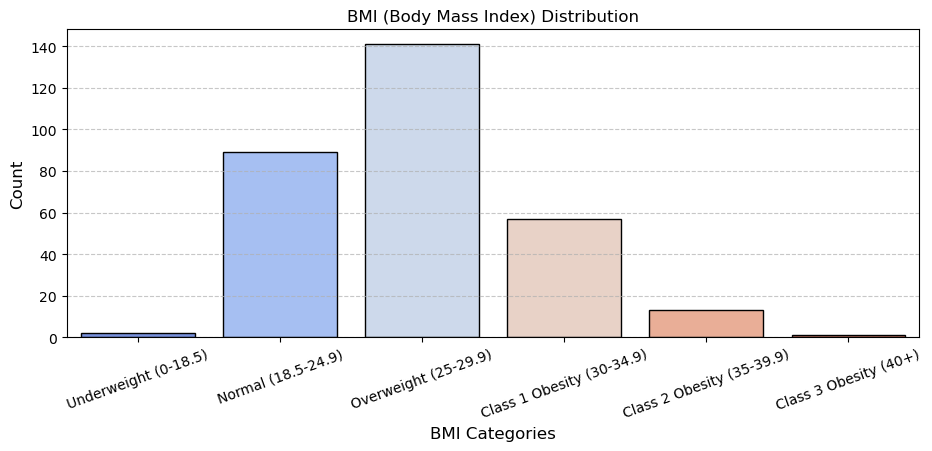

BMI
Underweight (0-18.5)           2
Normal (18.5-24.9)            89
Overweight (25-29.9)         141
Class 1 Obesity (30-34.9)     57
Class 2 Obesity (35-39.9)     13
Class 3 Obesity (40+)          1
Name: count, dtype: int64

In [250]:
#Grouping BMI Data According to WHO (World Health Organization) Ranges
bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]  # Sonsuz için float('inf')
labels = [
    'Underweight (0-18.5)', 'Normal (18.5-24.9)', 'Overweight (25-29.9)', 
    'Class 1 Obesity (30-34.9)', 'Class 2 Obesity (35-39.9)', 'Class 3 Obesity (40+)'
]

#BMI categorization
group_bmi = pd.cut(disease_df['BMI'], bins=bins, labels=labels, right=False)

#Counting the Number of Data Points in Each Group
group_counts = group_bmi.value_counts().sort_index()

plt.figure(figsize=(11, 4))
sns.countplot(x=group_bmi, hue=group_bmi, palette="coolwarm", edgecolor="black") 
plt.title('BMI (Body Mass Index) Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('BMI Categories', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=20)
plt.show()

group_counts


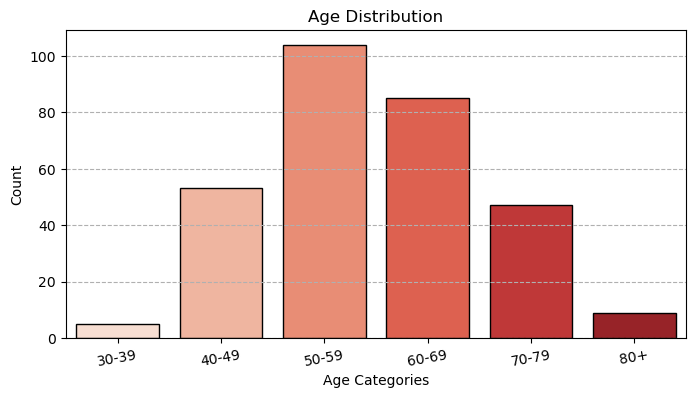

Age
30-39      5
40-49     53
50-59    104
60-69     85
70-79     47
80+        9
Name: count, dtype: int64

In [251]:
# Age data grouping
bins = [30, 40, 50, 60, 70, 80, 90]
labels = ['30-39', '40-49', '50-59', '60-69', '70-79', '80+']
group_age = pd.cut(disease_df['Age'], bins=bins, labels=labels, right=False)

# Counting the number of data points in each group
group_counts = group_age.value_counts().sort_index()

# Visualizing the grouped data
plt.figure(figsize=(8, 4))
sns.countplot(x=group_age, hue=group_age, palette="Reds", edgecolor="black", legend=False)
plt.title('Age Distribution')
plt.grid(axis='y', linestyle='--', alpha=1.0)  # Horizontal grid
plt.xlabel('Age Categories')
plt.ylabel('Count')
plt.xticks(rotation=10)
plt.show()

# Display the count of each group
group_counts


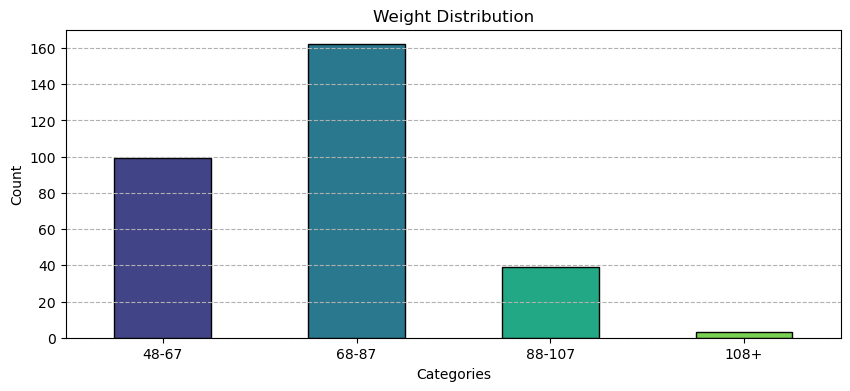

Weight
48-67      99
68-87     162
88-107     39
108+        3
Name: count, dtype: int64

In [252]:
# Grouping the Weight data
bins = [48, 68, 88, 108, 128]
labels = ['48-67', '68-87', '88-107', '108+']
group_weight = pd.cut(disease_df['Weight'], bins=bins, labels=labels, right=False)

# Counting the number of data points in each group
group_counts = group_weight.value_counts().sort_index()

# Visualizing the grouped data
plt.figure(figsize=(10, 4))
palette = sns.color_palette('viridis', len(group_counts))  # Apply viridis color palette to the columns
group_counts.plot(kind='bar', color=palette, edgecolor="black")  # Create a count plot
plt.title('Weight Distribution')
plt.grid(axis='y', linestyle='--', alpha=1.0)  # Horizontal grid
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Display the count of each group
group_counts

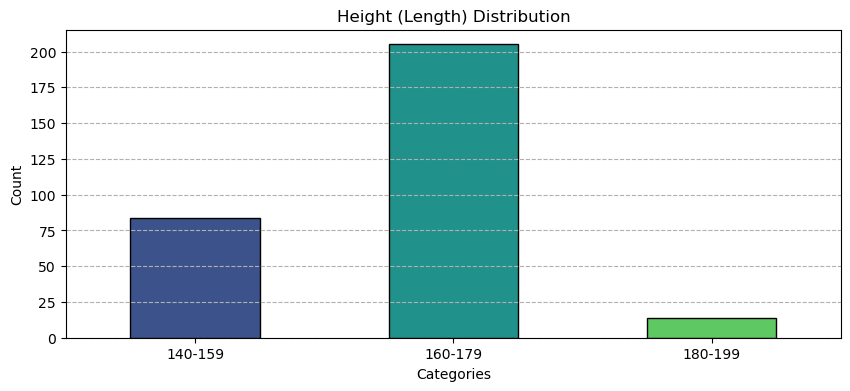

Length
140-159     84
160-179    205
180-199     14
Name: count, dtype: int64

In [253]:
# Grouping the Height (Length) data
bins = [140, 160, 180, 200]
labels = ['140-159', '160-179', '180-199']
group_length = pd.cut(disease_df['Length'], bins=bins, labels=labels, right=False)
group_counts = group_length.value_counts().sort_index()

# Visualizing the grouped data
plt.figure(figsize=(10, 4))
palette = sns.color_palette('viridis', len(group_counts))
group_counts.plot(kind='bar', color=palette, edgecolor="black")  # Create a bar plot
plt.title('Height (Length) Distribution')
plt.grid(axis='y', linestyle='--', alpha=1.0)  # Horizontal grid
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Display the count of each group
group_counts

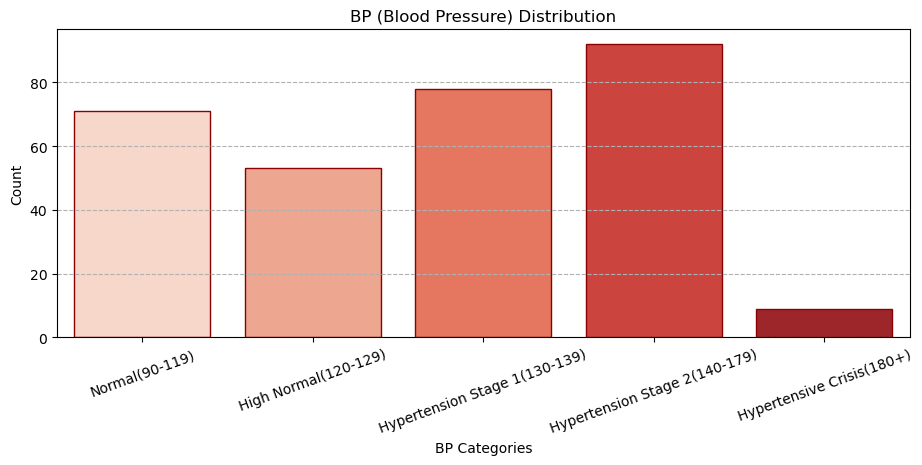

BP
Normal(90-119)                   71
High Normal(120-129)             53
Hypertension Stage 1(130-139)    78
Hypertension Stage 2(140-179)    92
Hypertensive Crisis(180+)         9
Name: count, dtype: int64

In [254]:
# Grouping the BP (Blood Pressure) data
bins = [90, 120, 130, 140, 180, 200]
labels = ['Normal(90-119)', 'High Normal(120-129)', 'Hypertension Stage 1(130-139)', 'Hypertension Stage 2(140-179)', 'Hypertensive Crisis(180+)']
group_bp = pd.cut(disease_df['BP'], bins=bins, labels=labels, right=False)
group_counts = group_bp.value_counts().sort_index()

# Visualizing the grouped data
plt.figure(figsize=(11, 4))
sns.barplot(x=group_counts.index, y=group_counts.values, hue=group_counts.index, palette="Reds", edgecolor="darkred")
plt.title('BP (Blood Pressure) Distribution')
plt.grid(axis='y', linestyle='--', alpha=1.0)  # Horizontal grid
plt.xlabel('BP Categories')
plt.ylabel('Count')
plt.xticks(rotation=20)
plt.show()

# Display the count of each group
group_counts

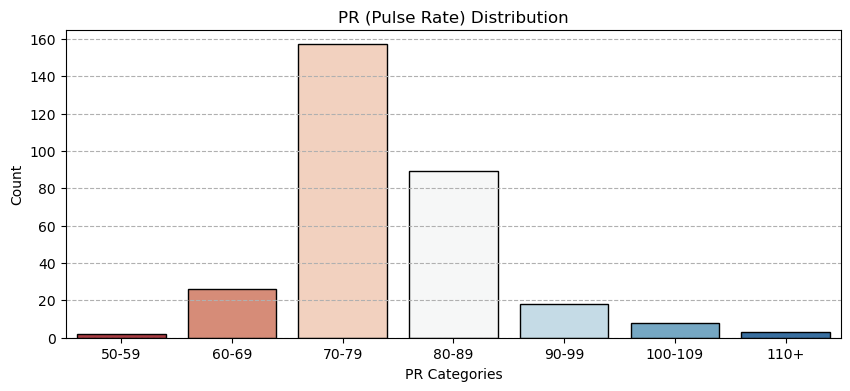

PR
50-59        2
60-69       26
70-79      157
80-89       89
90-99       18
100-109      8
110+         3
Name: count, dtype: int64

In [255]:
# Grouping the PR (Pulse Rate) data
bins = [50, 60, 70, 80, 90, 100, 110, 120]
labels = ['50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110+']
group_pr = pd.cut(disease_df['PR'], bins=bins, labels=labels, right=False)
group_counts = group_pr.value_counts().sort_index()

# Visualizing the grouped data
plt.figure(figsize=(10, 4))
sns.barplot(x=group_counts.index, y=group_counts.values, hue=group_counts.index, palette="RdBu", edgecolor="black")
plt.title('PR (Pulse Rate) Distribution')
plt.grid(axis='y', linestyle='--', alpha=1.0)  # Horizontal grid
plt.xlabel('PR Categories')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Display the count of each group
group_counts

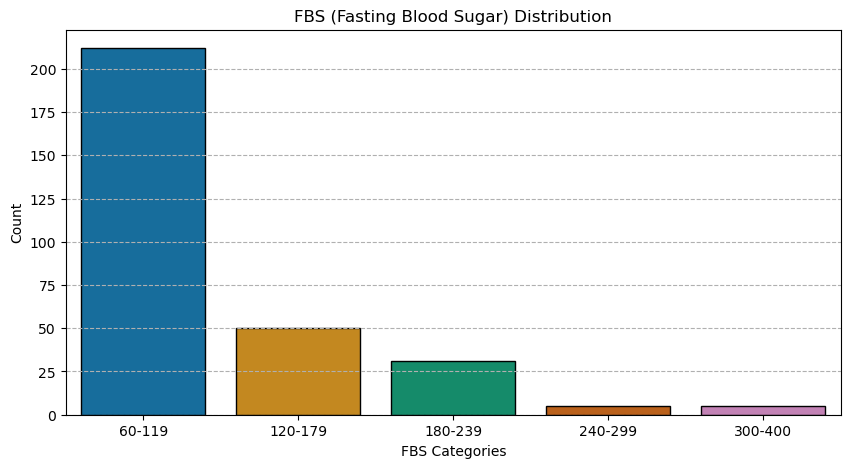

FBS
60-119     212
120-179     50
180-239     31
240-299      5
300-400      5
Name: count, dtype: int64

In [256]:
# Grouping the FBS (Fasting Blood Sugar) data
bins = [60, 120, 180, 240, 300, 401]
labels = ['60-119', '120-179', '180-239', '240-299', '300-400']
group_fbs = pd.cut(disease_df['FBS'], bins=bins, labels=labels, right=False)
group_counts = group_fbs.value_counts().sort_index()

# Visualizing the grouped data
plt.figure(figsize=(10, 5))
sns.barplot(x=group_counts.index, y=group_counts.values, hue=group_counts.index, palette="colorblind", edgecolor="black")
plt.title('FBS (Fasting Blood Sugar) Distribution')
plt.grid(axis='y', linestyle='--', alpha=1.0)  # Horizontal grid
plt.xlabel('FBS Categories')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Display the count of each group
group_counts

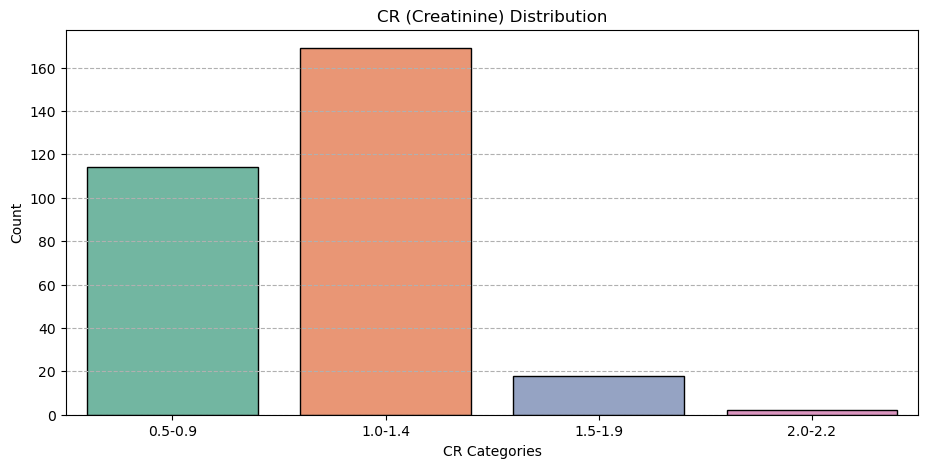

CR
0.5-0.9    114
1.0-1.4    169
1.5-1.9     18
2.0-2.2      2
Name: count, dtype: int64

In [257]:
# Grouping the CR (Creatinine) data
bins = [0.5, 1.0, 1.5, 2.0, 2.3]
labels = ['0.5-0.9', '1.0-1.4', '1.5-1.9', '2.0-2.2']
group_cr = pd.cut(disease_df['CR'], bins=bins, labels=labels, right=False)
group_counts = group_cr.value_counts().sort_index()

# Visualizing the grouped data
plt.figure(figsize=(11, 5))
sns.barplot(x=group_counts.index, y=group_counts.values, hue=group_counts.index, palette="Set2", edgecolor="black")
plt.title('CR (Creatinine) Distribution')
plt.grid(axis='y', linestyle='--', alpha=1.0)  # Horizontal grid
plt.xlabel('CR Categories')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Display the count of each group
group_counts

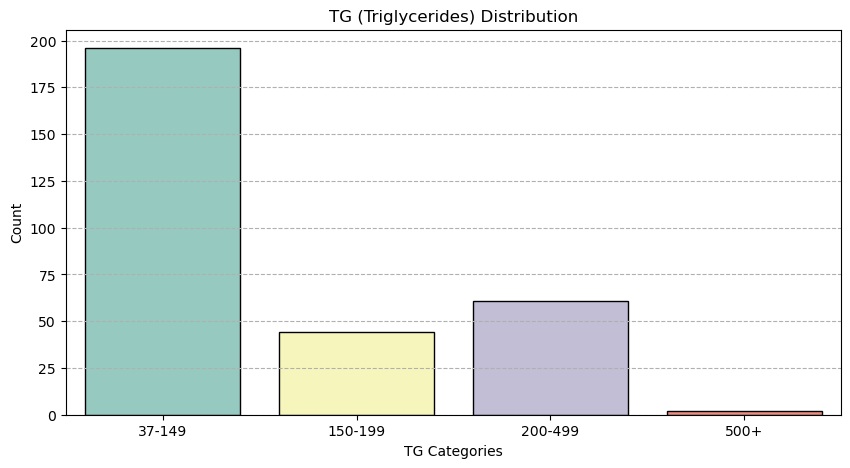

TG
37-149     196
150-199     44
200-499     61
500+         2
Name: count, dtype: int64

In [258]:
# Grouping the TG (Triglycerides) data
bins = [37, 150, 200, 500, 2000]
labels = ['37-149', '150-199', '200-499', '500+']
group_tg = pd.cut(disease_df['TG'], bins=bins, labels=labels, right=False)
group_counts = group_tg.value_counts().sort_index()

# Visualizing the grouped data
plt.figure(figsize=(10, 5))
sns.barplot(x=group_counts.index, y=group_counts.values, hue=group_counts.index, palette="Set3", edgecolor="black")
plt.title('TG (Triglycerides) Distribution')
plt.grid(axis='y', linestyle='--', alpha=1.0)  # Horizontal grid
plt.xlabel('TG Categories')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Display the count of each group
group_counts

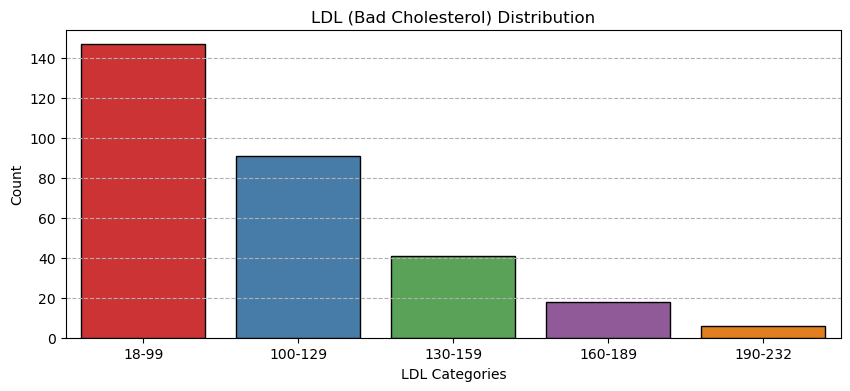

LDL
18-99      147
100-129     91
130-159     41
160-189     18
190-232      6
Name: count, dtype: int64

In [259]:
# Grouping the LDL (Bad Cholesterol) data
bins = [18, 100, 130, 160, 190, 233]
labels = ['18-99', '100-129', '130-159', '160-189', '190-232']
group_ldl = pd.cut(disease_df['LDL'], bins=bins, labels=labels, right=False)
group_counts = group_ldl.value_counts().sort_index()

# Visualizing the grouped data
plt.figure(figsize=(10, 4))
sns.barplot(x=group_counts.index, y=group_counts.values, hue=group_counts.index, palette="Set1", edgecolor="black")
plt.title('LDL (Bad Cholesterol) Distribution')
plt.grid(axis='y', linestyle='--', alpha=1.0)  # Horizontal grid
plt.xlabel('LDL Categories')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Display the count of each group
group_counts

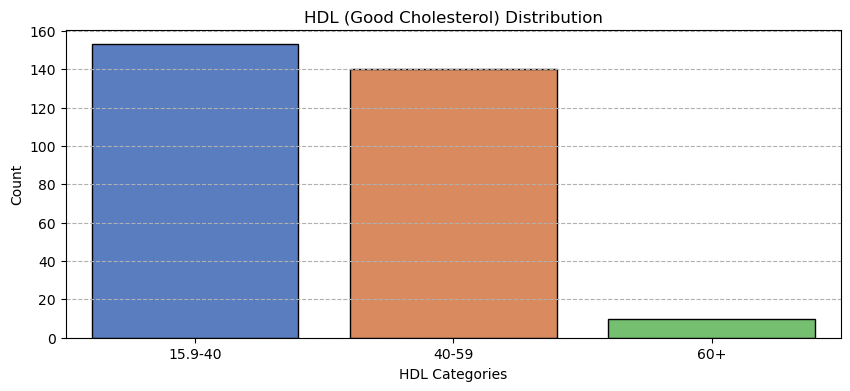

HDL
15.9-40    153
40-59      140
60+         10
Name: count, dtype: int64

In [260]:
# Grouping the HDL (Good Cholesterol) data
bins = [15.9, 40, 60, 112]
labels = ['15.9-40', '40-59', '60+']
group_hdl = pd.cut(disease_df['HDL'], bins=bins, labels=labels, right=False)
group_counts = group_hdl.value_counts().sort_index()

# Visualizing the grouped data
plt.figure(figsize=(10, 4))
sns.barplot(x=group_counts.index, y=group_counts.values, hue=group_counts.index, palette="muted", edgecolor="black")
plt.title('HDL (Good Cholesterol) Distribution')
plt.grid(axis='y', linestyle='--', alpha=1.0)  # Horizontal grid
plt.xlabel('HDL Categories')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Display the count of each group
group_counts

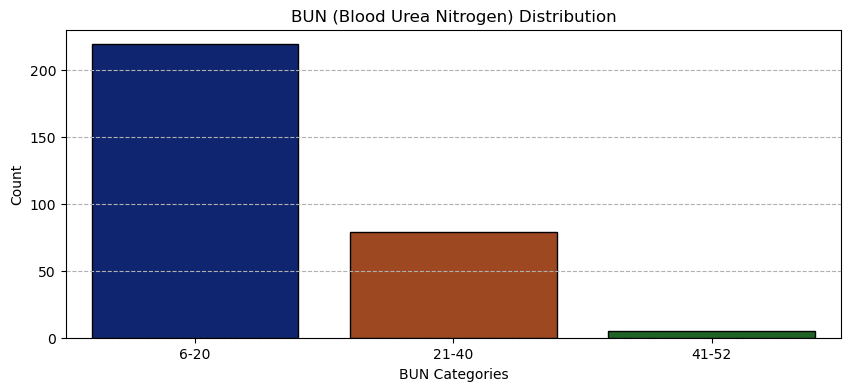

BUN
6-20     219
21-40     79
41-52      5
Name: count, dtype: int64

In [261]:
# Grouping the BUN (Blood Urea Nitrogen) data
bins = [5, 20, 40, 53]
labels = ['6-20', '21-40', '41-52']
group_bun = pd.cut(disease_df['BUN'], bins=bins, labels=labels, right=False)
group_counts = group_bun.value_counts().sort_index()

# Visualizing the grouped data
plt.figure(figsize=(10, 4))
sns.barplot(x=group_counts.index, y=group_counts.values, hue=group_counts.index, palette="dark", edgecolor="black")
plt.title('BUN (Blood Urea Nitrogen) Distribution')
plt.grid(axis='y', linestyle='--', alpha=1.0)  # Horizontal grid
plt.xlabel('BUN Categories')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Display the count of each group
group_counts

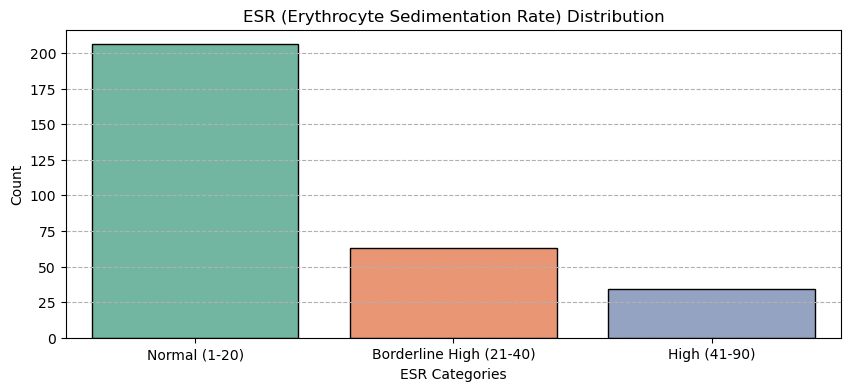

ESR
Normal (1-20)              206
Borderline High (21-40)     63
High (41-90)                34
Name: count, dtype: int64

In [262]:
# Grouping the ESR (Erythrocyte Sedimentation Rate) data
bins = [1, 21, 40, 91]
labels = ['Normal (1-20)', 'Borderline High (21-40)', 'High (41-90)']
group_esr = pd.cut(disease_df['ESR'], bins=bins, labels=labels, right=False)
group_counts = group_esr.value_counts().sort_index()

# Visualizing the grouped data
plt.figure(figsize=(10, 4))
sns.barplot(x=group_counts.index, y=group_counts.values, hue=group_counts.index, palette="Set2", edgecolor="black")
plt.title('ESR (Erythrocyte Sedimentation Rate) Distribution')
plt.grid(axis='y', linestyle='--', alpha=1.0)  # Horizontal grid
plt.xlabel('ESR Categories')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Display the count of each group
group_counts

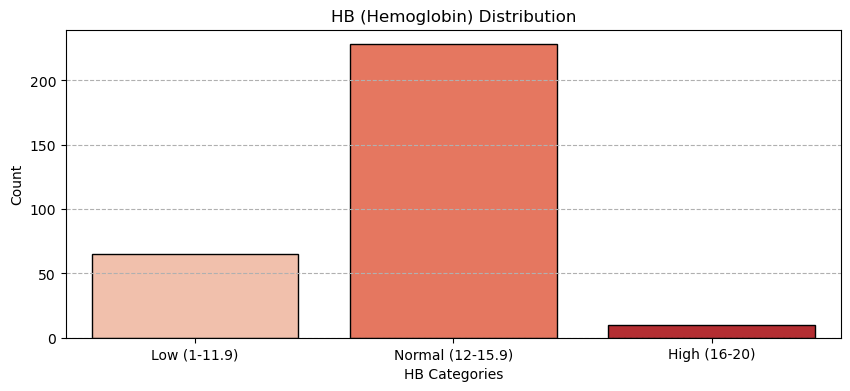

HB
Low (1-11.9)         65
Normal (12-15.9)    228
High (16-20)         10
Name: count, dtype: int64

In [263]:
# Grouping the HB (Hemoglobin) data
bins = [1, 12, 16, 20]
labels = ['Low (1-11.9)', 'Normal (12-15.9)', 'High (16-20)']
group_hb = pd.cut(disease_df['HB'], bins=bins, labels=labels, right=False)
group_counts = group_hb.value_counts().sort_index()

# Visualizing the grouped data
plt.figure(figsize=(10, 4))
sns.barplot(x=group_counts.index, y=group_counts.values, hue=group_counts.index, palette="Reds", edgecolor="black")
plt.title('HB (Hemoglobin) Distribution')
plt.grid(axis='y', linestyle='--', alpha=1.0)  # Horizontal grid
plt.xlabel('HB Categories')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Display the count of each group
group_counts

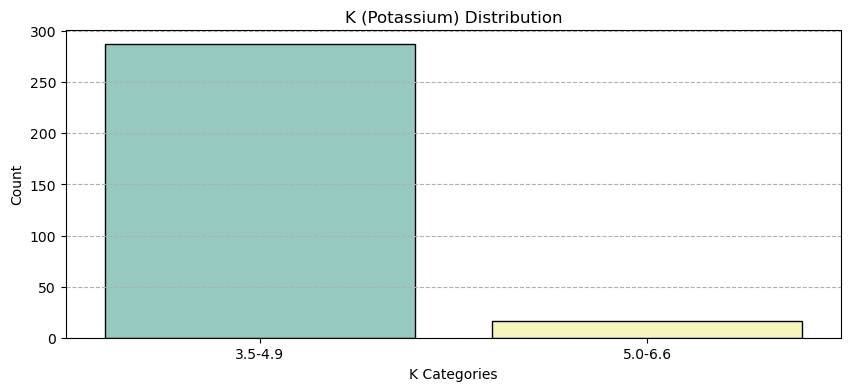

K
3.5-4.9    287
5.0-6.6     16
Name: count, dtype: int64

In [264]:
# Grouping the K (Potassium) data
bins = [3.0, 5.0, 7.0]  # 3-6,6
labels = ["3.5-4.9", "5.0-6.6"]
group_k = pd.cut(disease_df['K'], bins=bins, labels=labels, right=False)
group_counts = group_k.value_counts().sort_index()

# Visualizing the grouped data
plt.figure(figsize=(10, 4))
sns.barplot(x=group_counts.index, y=group_counts.values, hue=group_counts.index, palette="Set3", edgecolor="black")
plt.title("K (Potassium) Distribution")
plt.grid(axis='y', linestyle='--', alpha=1.0)  # Horizontal grid
plt.xlabel("K Categories")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# Display the count of each group
group_counts

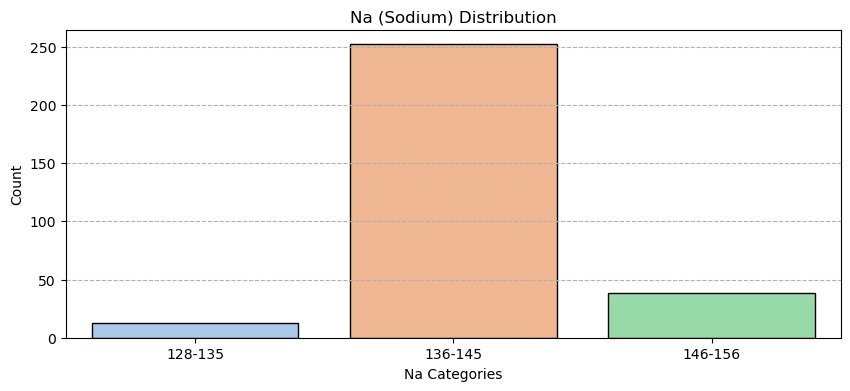

Na
128-135     13
136-145    252
146-156     38
Name: count, dtype: int64

In [265]:
# Grouping the Na (Sodium) data
bins = [127, 135, 145, 157]
labels = ['128-135', '136-145', '146-156']
group_na = pd.cut(disease_df["Na"], bins=bins, labels=labels, right=False)
group_counts = group_na.value_counts().sort_index()

# Visualizing the grouped data
plt.figure(figsize=(10, 4))
sns.barplot(x=group_counts.index, y=group_counts.values, hue=group_counts.index, palette="pastel", edgecolor="black")
plt.title("Na (Sodium) Distribution")
plt.grid(axis='y', linestyle='--', alpha=1.0)  # Horizontal grid
plt.xlabel("Na Categories")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# Display the count of each group
group_counts

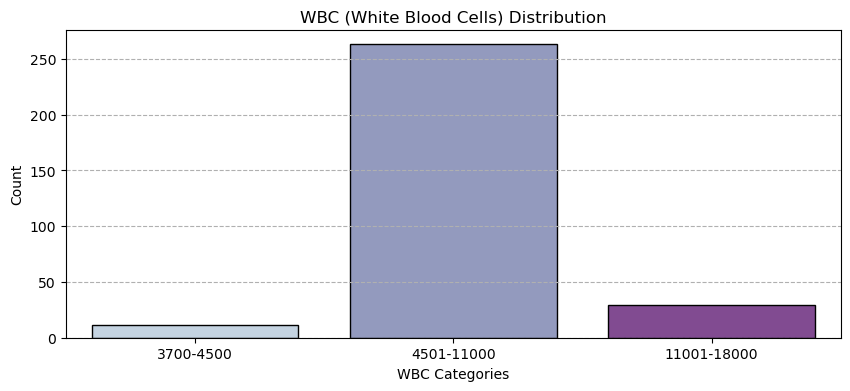

WBC
3700-4500       11
4501-11000     263
11001-18000     29
Name: count, dtype: int64

In [266]:
# Grouping the WBC (White Blood Cells) data
bins = [3700, 4500, 11000, 18001]
labels = ['3700-4500', '4501-11000', '11001-18000']
group_wbc = pd.cut(disease_df["WBC"], bins=bins, labels=labels, right=False)
group_counts = group_wbc.value_counts().sort_index()

# Visualizing the grouped data
plt.figure(figsize=(10, 4))
sns.barplot(x=group_counts.index, y=group_counts.values, hue=group_counts.index, palette="BuPu", edgecolor="black")
plt.title("WBC (White Blood Cells) Distribution")
plt.grid(axis='y', linestyle='--', alpha=1.0)  # Horizontal grid
plt.xlabel("WBC Categories")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# Display the count of each group
group_counts

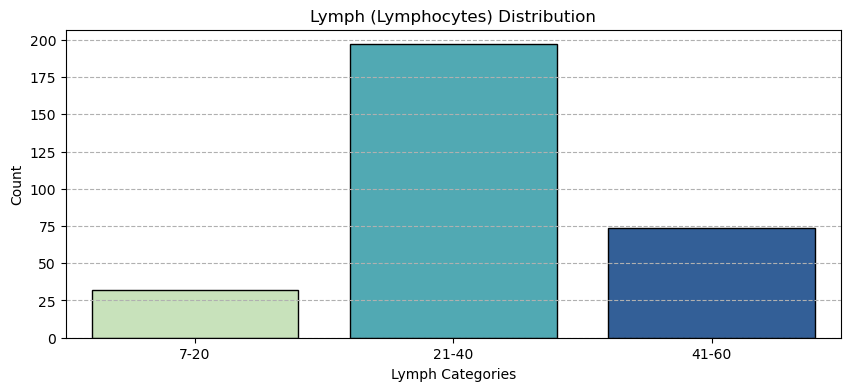

Lymph
7-20      32
21-40    197
41-60     74
Name: count, dtype: int64

In [267]:
# Grouping the Lymph (Lymphocytes) data
bins = [6, 20, 40, 61]
labels = ['7-20', '21-40', '41-60']
group_lymph = pd.cut(disease_df["Lymph"], bins=bins, labels=labels, right=False)
group_counts = group_lymph.value_counts().sort_index()

# Visualizing the grouped data
plt.figure(figsize=(10, 4))
sns.barplot(x=group_counts.index, y=group_counts.values, hue=group_counts.index, palette="YlGnBu", edgecolor="black")
plt.title("Lymph (Lymphocytes) Distribution")
plt.grid(axis='y', linestyle='--', alpha=1.0)  # Added horizontal grid to better view the counts
plt.xlabel("Lymph Categories")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# Display the count of each group
group_counts

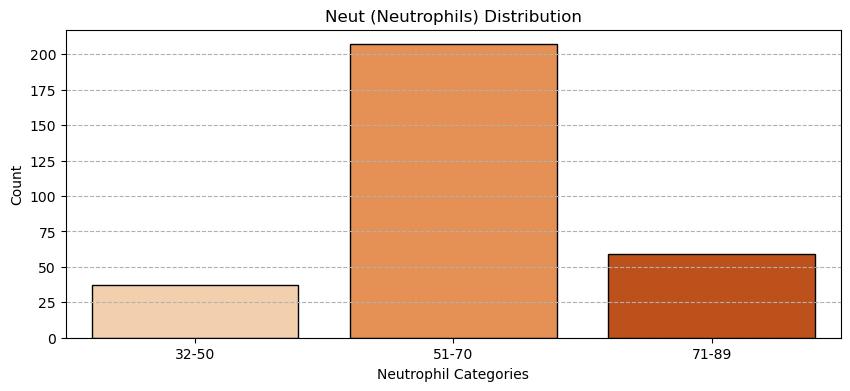

Neut
32-50     37
51-70    207
71-89     59
Name: count, dtype: int64

In [268]:
# Grouping the Neut (Neutrophils) data
bins = [31, 50, 70, 90]
labels = ['32-50', '51-70', '71-89']
group_neut = pd.cut(disease_df["Neut"], bins=bins, labels=labels, right=False)
group_counts = group_neut.value_counts().sort_index()

# Visualizing the grouped data
plt.figure(figsize=(10, 4))
sns.barplot(x=group_counts.index, y=group_counts.values, hue=group_counts.index, palette="Oranges", edgecolor="black")
plt.title("Neut (Neutrophils) Distribution")
plt.grid(axis='y', linestyle='--', alpha=1.0)  # Added horizontal grid to better view the counts
plt.xlabel("Neutrophil Categories")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# Display the count of each group
group_counts

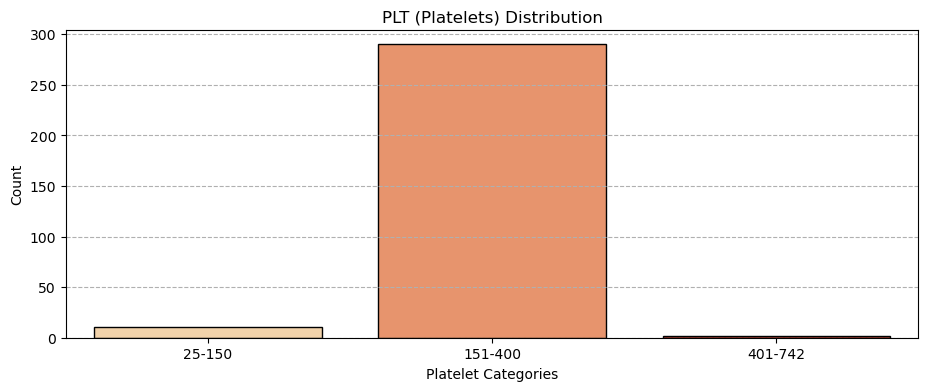

PLT
25-150      11
151-400    290
401-742      2
Name: count, dtype: int64

In [269]:
# Grouping the PLT (Platelets) data
bins = [24, 150, 400, 743]
labels = ['25-150', '151-400', '401-742']
group_plt = pd.cut(disease_df["PLT"], bins=bins, labels=labels, right=False)
group_counts = group_plt.value_counts().sort_index()

# Visualizing the grouped data
plt.figure(figsize=(11, 4))
sns.barplot(x=group_counts.index, y=group_counts.values, hue=group_counts.index, palette="OrRd", edgecolor="black")
plt.title("PLT (Platelets) Distribution")
plt.grid(axis='y', linestyle='--', alpha=1.0)  # Added horizontal grid to better view the counts
plt.xlabel("Platelet Categories")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# Display the count of each group
group_counts

## The Visualization of Non-Grouped Columns

At this stage, the goal is to examine the distribution of data more effectively by visualizing the columns, as was done in the previous step. Since the columns here already contain data in several categories, they were visualized at once using the bar_plot function and a for loop. The quantity of each group was then printed on the screen after the graph using columns_counts. Subsequently, the correlation between some numerical columns was analyzed using a heatmap.

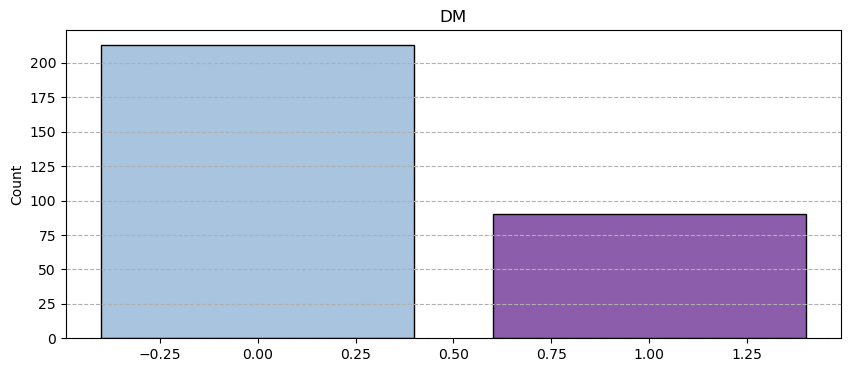

DM: 
 DM
0    213
1     90
Name: count, dtype: int64


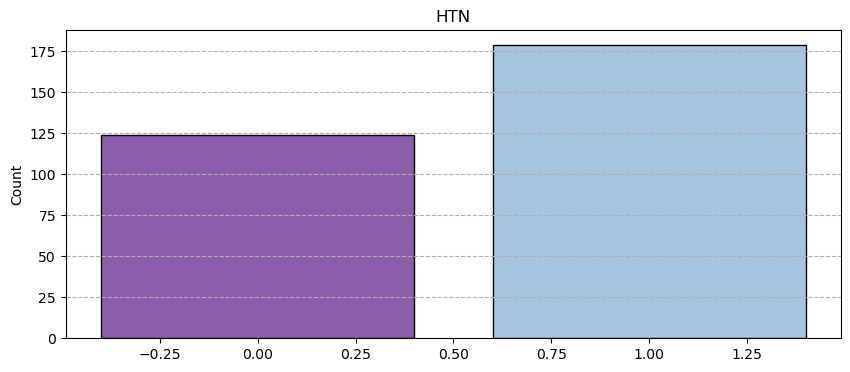

HTN: 
 HTN
1    179
0    124
Name: count, dtype: int64


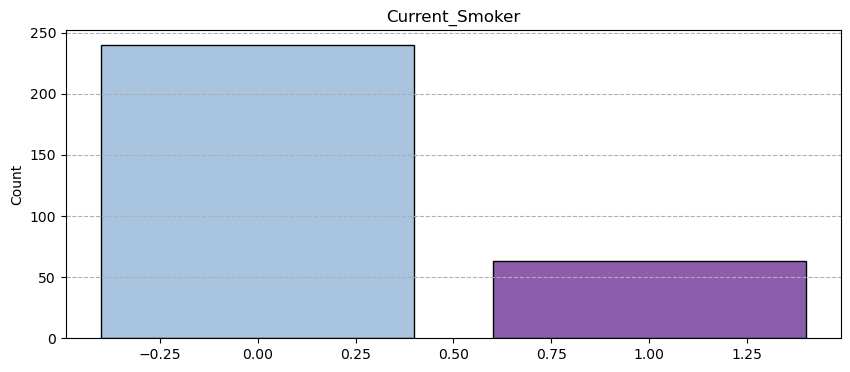

Current_Smoker: 
 Current_Smoker
0    240
1     63
Name: count, dtype: int64


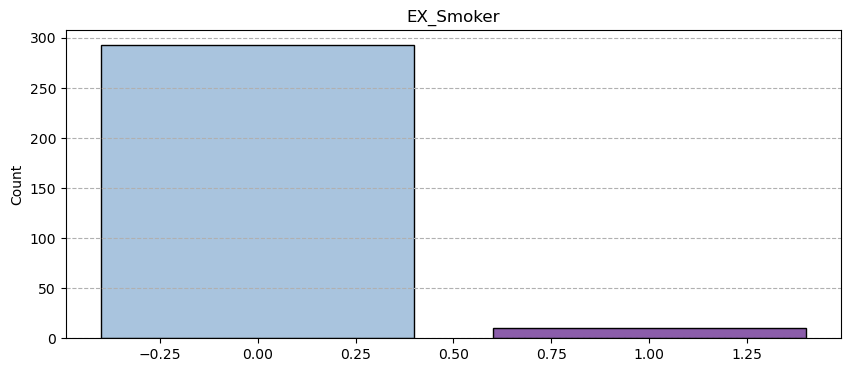

EX_Smoker: 
 EX_Smoker
0    293
1     10
Name: count, dtype: int64


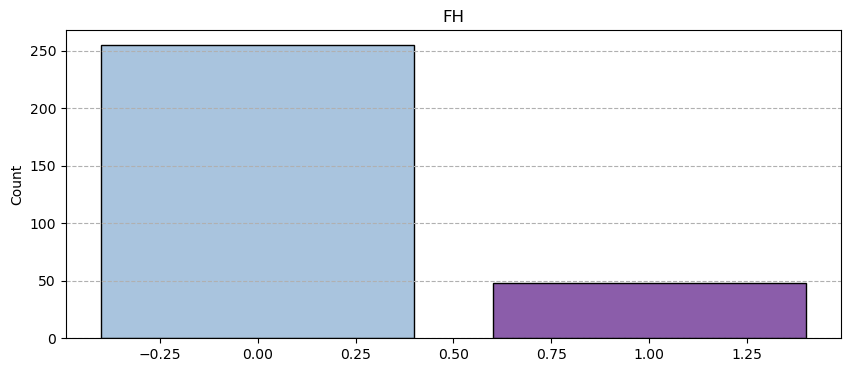

FH: 
 FH
0    255
1     48
Name: count, dtype: int64


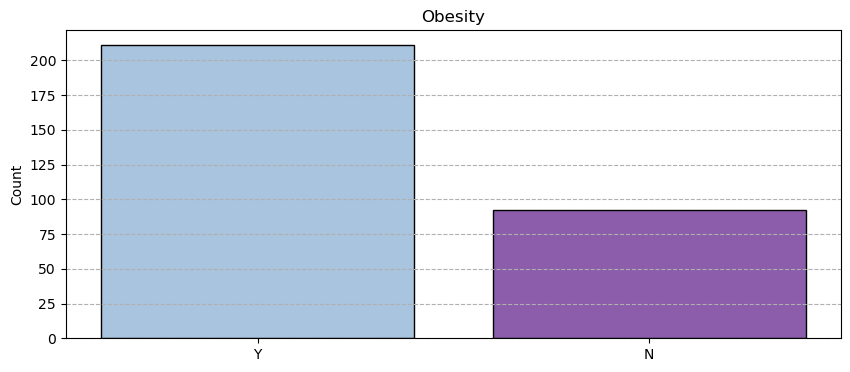

Obesity: 
 Obesity
Y    211
N     92
Name: count, dtype: int64


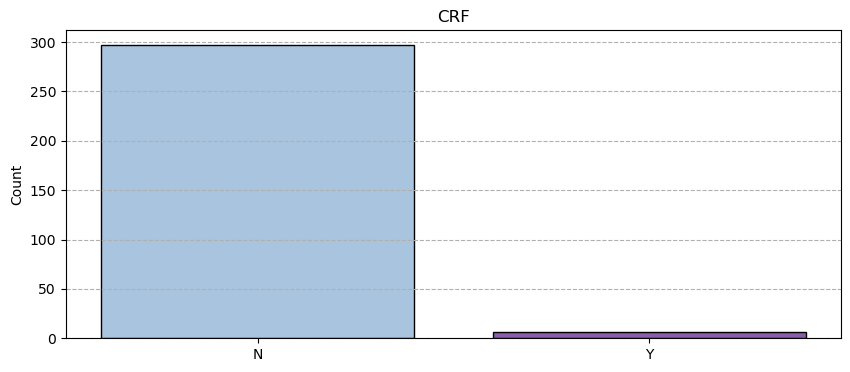

CRF: 
 CRF
N    297
Y      6
Name: count, dtype: int64


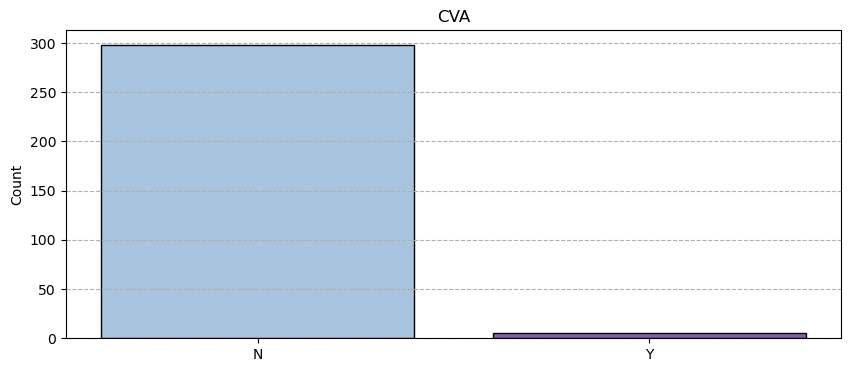

CVA: 
 CVA
N    298
Y      5
Name: count, dtype: int64


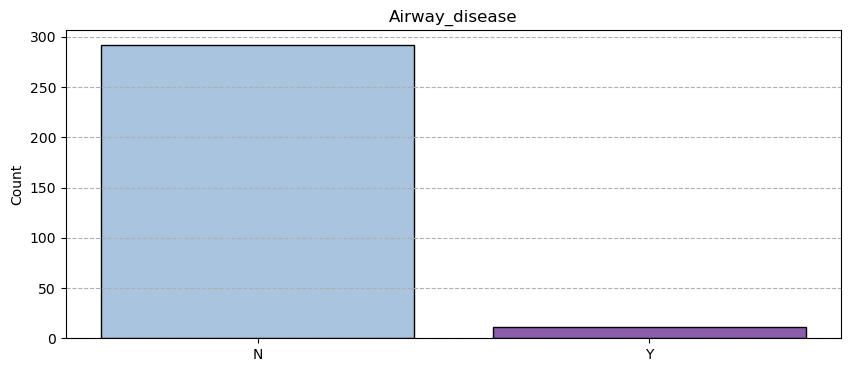

Airway_disease: 
 Airway_disease
N    292
Y     11
Name: count, dtype: int64


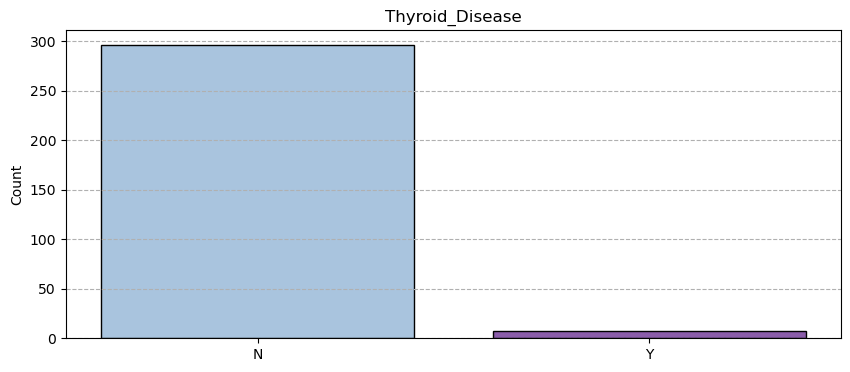

Thyroid_Disease: 
 Thyroid_Disease
N    296
Y      7
Name: count, dtype: int64


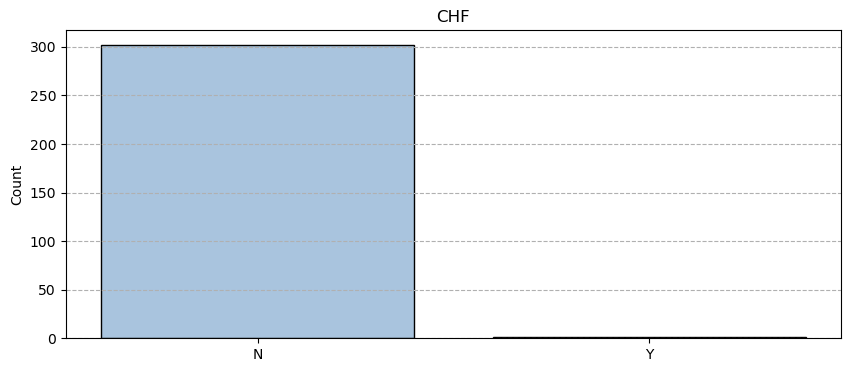

CHF: 
 CHF
N    302
Y      1
Name: count, dtype: int64


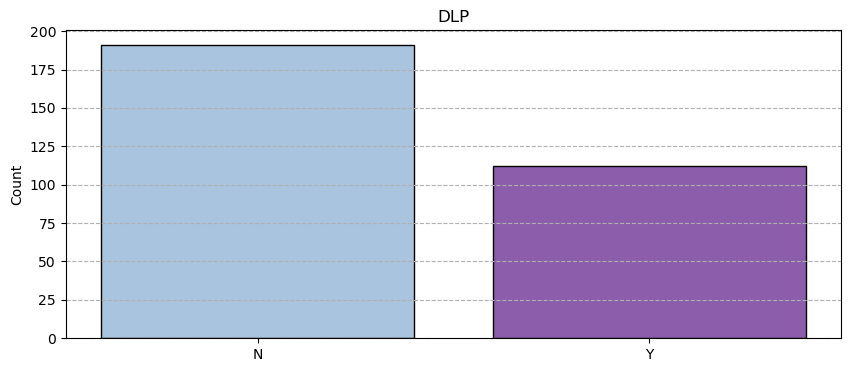

DLP: 
 DLP
N    191
Y    112
Name: count, dtype: int64


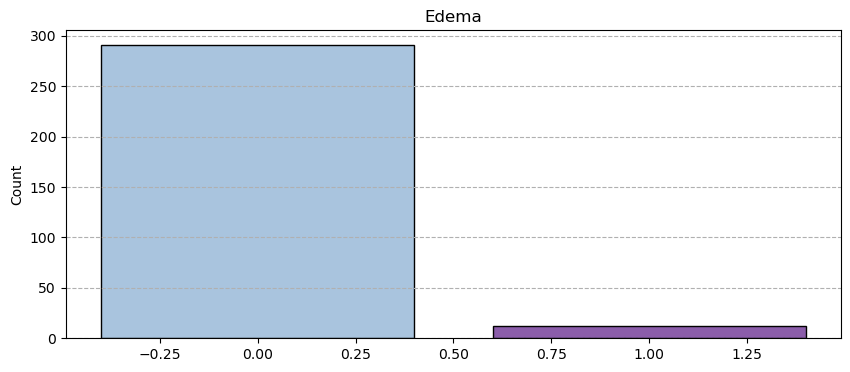

Edema: 
 Edema
0    291
1     12
Name: count, dtype: int64


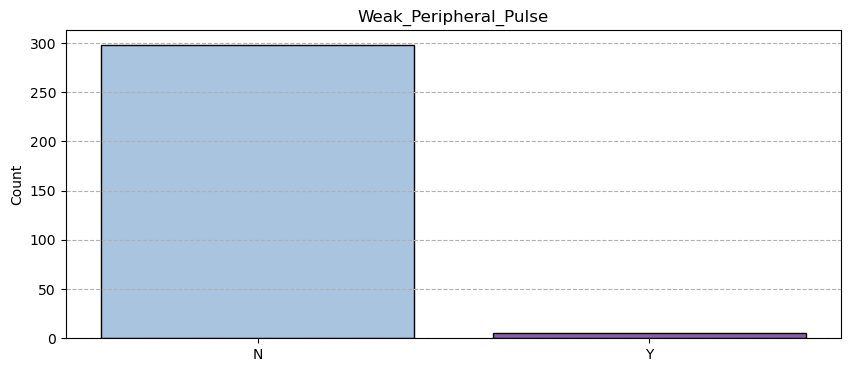

Weak_Peripheral_Pulse: 
 Weak_Peripheral_Pulse
N    298
Y      5
Name: count, dtype: int64


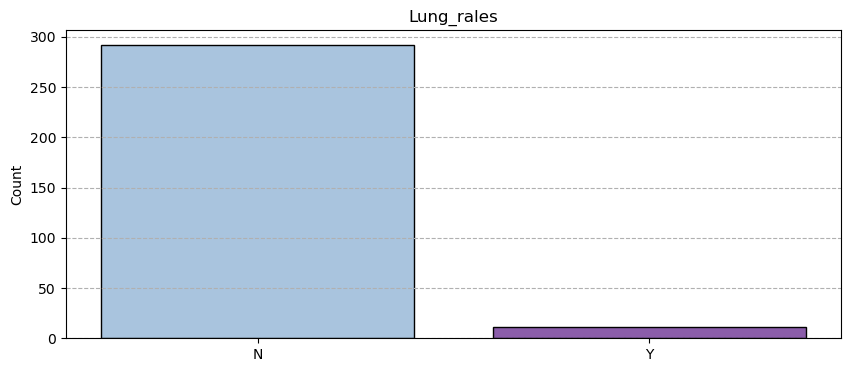

Lung_rales: 
 Lung_rales
N    292
Y     11
Name: count, dtype: int64


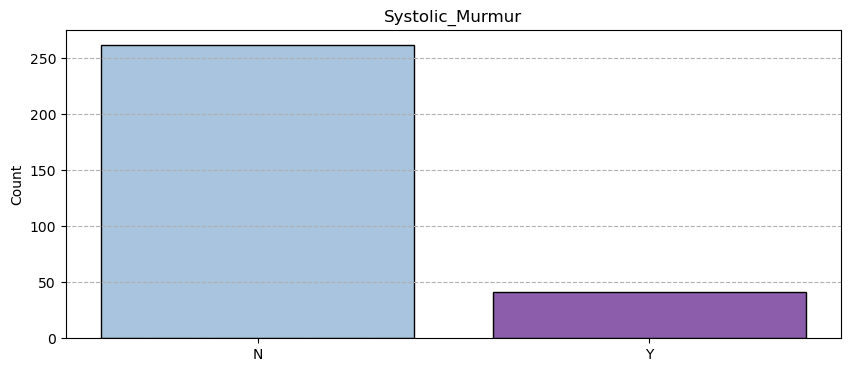

Systolic_Murmur: 
 Systolic_Murmur
N    262
Y     41
Name: count, dtype: int64


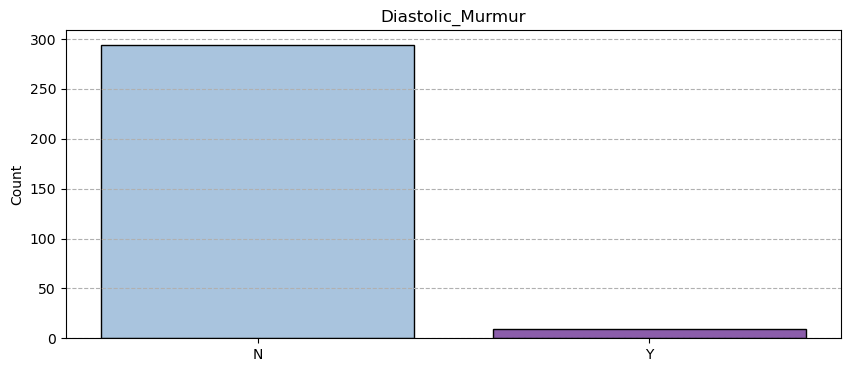

Diastolic_Murmur: 
 Diastolic_Murmur
N    294
Y      9
Name: count, dtype: int64


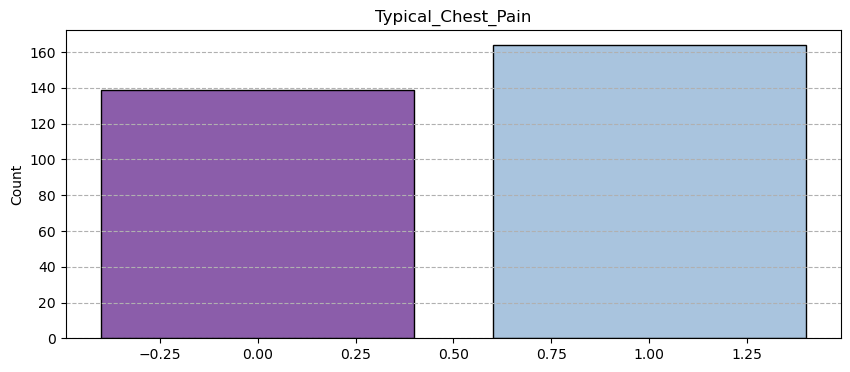

Typical_Chest_Pain: 
 Typical_Chest_Pain
1    164
0    139
Name: count, dtype: int64


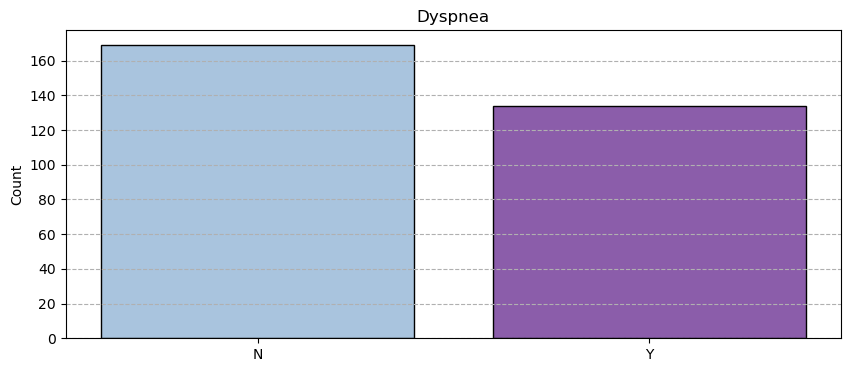

Dyspnea: 
 Dyspnea
N    169
Y    134
Name: count, dtype: int64


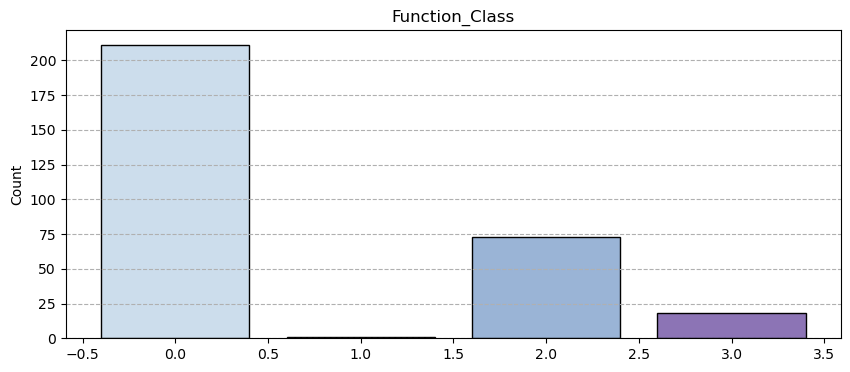

Function_Class: 
 Function_Class
0    211
2     73
3     18
1      1
Name: count, dtype: int64


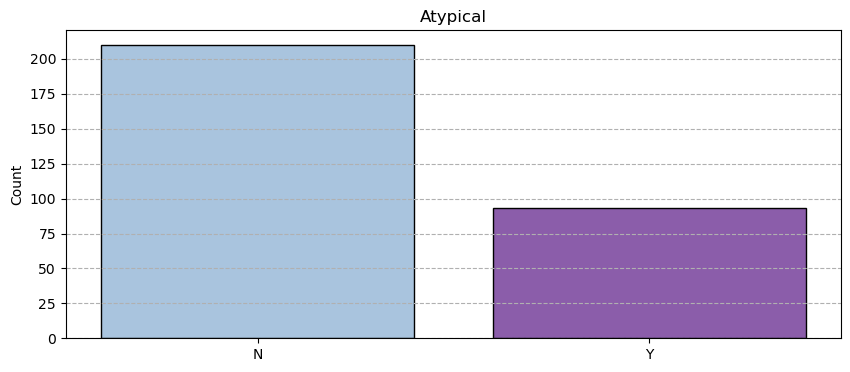

Atypical: 
 Atypical
N    210
Y     93
Name: count, dtype: int64


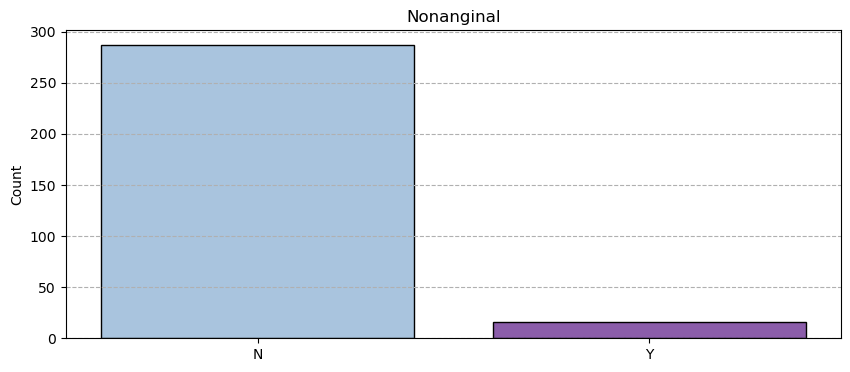

Nonanginal: 
 Nonanginal
N    287
Y     16
Name: count, dtype: int64


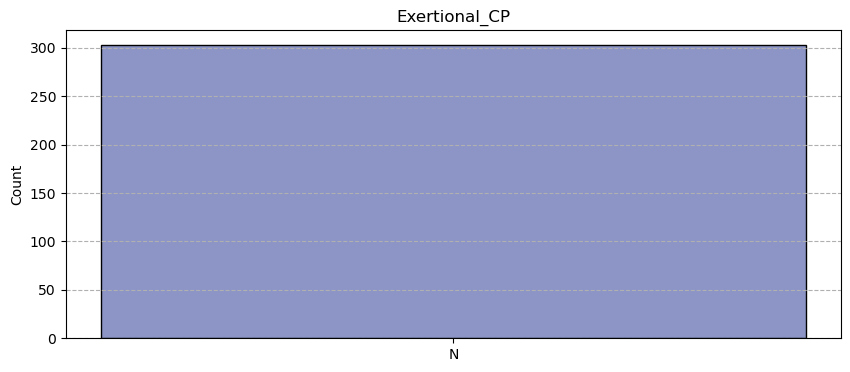

Exertional_CP: 
 Exertional_CP
N    303
Name: count, dtype: int64


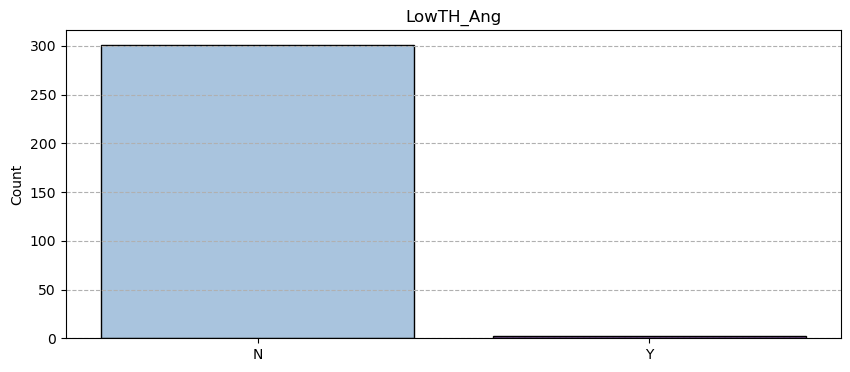

LowTH_Ang: 
 LowTH_Ang
N    301
Y      2
Name: count, dtype: int64


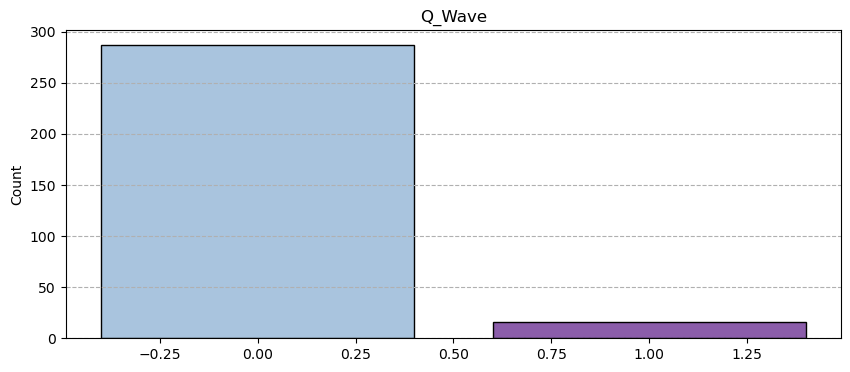

Q_Wave: 
 Q_Wave
0    287
1     16
Name: count, dtype: int64


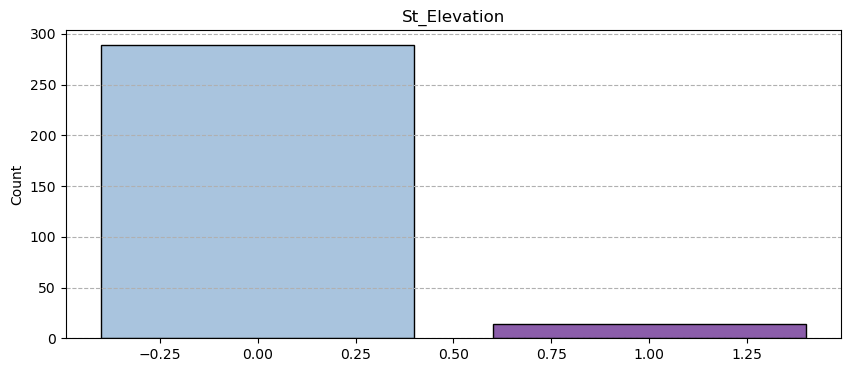

St_Elevation: 
 St_Elevation
0    289
1     14
Name: count, dtype: int64


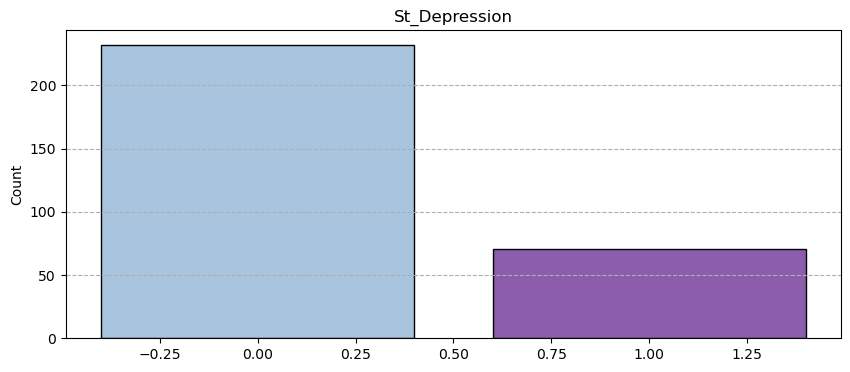

St_Depression: 
 St_Depression
0    232
1     71
Name: count, dtype: int64


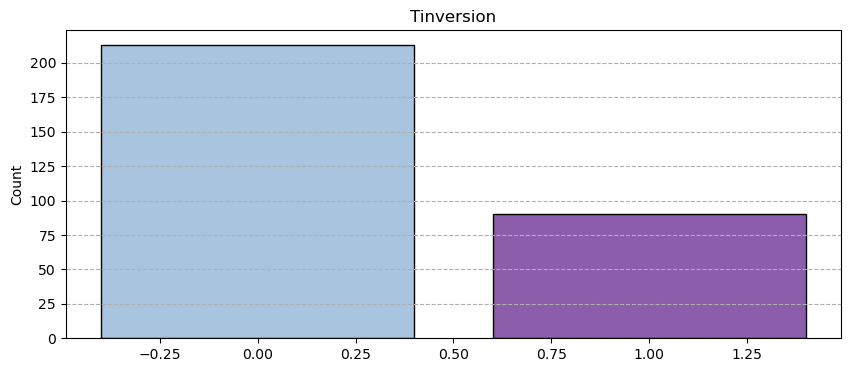

Tinversion: 
 Tinversion
0    213
1     90
Name: count, dtype: int64


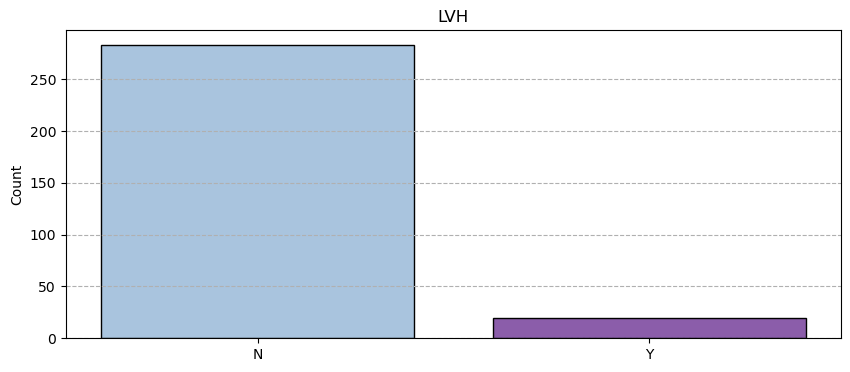

LVH: 
 LVH
N    283
Y     20
Name: count, dtype: int64


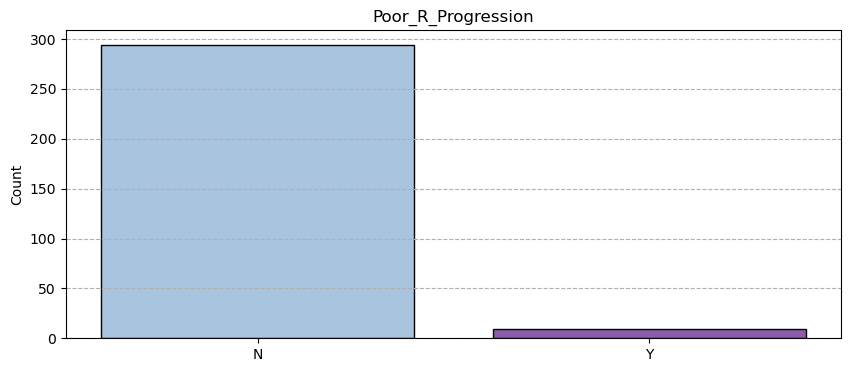

Poor_R_Progression: 
 Poor_R_Progression
N    294
Y      9
Name: count, dtype: int64


KeyError: 'EF-TTE'

In [272]:
def bar_plot(other_columns):
    columns = disease_df[other_columns]
    columns_counts = columns.value_counts()
    
    # Using Seaborn palette to get colors
    palette = sns.color_palette("BuPu", len(columns_counts))

    # Creating the plot
    plt.figure(figsize=(10, 4))
    plt.bar(columns_counts.index, columns_counts, color=palette, edgecolor="black")
    plt.xticks(rotation=0)
    plt.ylabel("Count")
    plt.title(other_columns)
    plt.grid(axis='y', linestyle='--', alpha=1.0)  # Horizontal grid
    plt.show()
    
    # Output the counts
    print("{}: \n {}".format(other_columns, columns_counts))

# Columns for which plots will be created
other_columns_names = ["DM", "HTN", "Current_Smoker", "EX_Smoker", "FH", "Obesity", "CRF", "CVA", "Airway_disease", 
                       "Thyroid_Disease", "CHF", "DLP", "Edema", "Weak_Peripheral_Pulse", "Lung_rales", "Systolic_Murmur", 
                       "Diastolic_Murmur", "Typical_Chest_Pain", "Dyspnea", "Function_Class", "Atypical", "Nonanginal", 
                       "Exertional_CP", "LowTH_Ang", "Q_Wave", "St_Elevation", "St_Depression", "Tinversion", "LVH", 
                       "Poor_R_Progression", "EF-TTE", "Region_RWMA", "Cath"]

# Creating bar plots for the columns using a for loop
for column in other_columns_names:
    bar_plot(column)


In [ ]:
# Let's visualize the correlation between some numeric columns on a correlation heatmap.
some_numeric_columns = ["DM", "HTN", "Current_Smoker", "EX_Smoker", "FH", "Q_Wave", "St_Elevation", "St_Depression", "Tinversion"]
some_df = disease_df[some_numeric_columns]

# Create the correlation matrix
corr_matrix = some_df.corr()

# Inputs for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# Numerical Transformation of VHD Data Using One-Hot Encoding

In this stage, an effort was made to numericalize the target column, VHD. First, the .describe() method was used to better understand the VHD column. It was found that the column consists of 303 records, contains 4 categories, with "mild" being the most frequent category, appearing 149 times. Following this, the VHD data was numericalized by converting each VHD category into a separate column using the one-hot encoding method. Consequently, four target columns were created for further use in the study: "VHD_N", "VHD_mild", "VHD_Moderate", and "VHD_Severe". These columns take binary values (0 = the patient does not have this type, and 1 = the patient has this type).

Subsequently, a line plot was created to examine the distribution of each VHD type. The counts variable, which shows how many 0s and 1s each VHD type column contains, was displayed after the graph. The conclusion drawn from this was that the VHD_N and VHD_mild columns have a balanced distribution, whereas the VHD_Moderate and VHD_Severe columns exhibit highly imbalanced distributions.

In [ ]:
disease_df["VHD"].describe()

In [ ]:
#I have converted the "VHD" column into numerical values and created a separate column for each VHD type.
disease_df = pd.get_dummies(disease_df, columns=['VHD'], prefix='VHD')
disease_df[['VHD_N','VHD_mild','VHD_Moderate','VHD_Severe']] = disease_df[['VHD_N','VHD_mild','VHD_Moderate','VHD_Severe']].astype(int)
disease_df.dtypes

In [ ]:
#Here, we can see which type of VHD individuals have.
vhd_info = disease_df[['VHD_N','VHD_mild','VHD_Moderate','VHD_Severe']]
vhd_info

In [ ]:
#Displaying the Frequency Distribution of VHD Types on a Lineplot:

#The quantities, or frequencies, of 0 and 1 values for each VHD type were calculated.
counts = {
    'VHD_N': disease_df['VHD_N'].value_counts(),
    'VHD_mild': disease_df['VHD_mild'].value_counts(),
    'VHD_Moderate': disease_df['VHD_Moderate'].value_counts(),
    'VHD_Severe': disease_df['VHD_Severe'].value_counts()
}

In [ ]:
#The counts dictionary was converted into a dataframe, and the rows and columns were swapped.
counts_df = pd.DataFrame(counts).T  #With the transpose operation, each type became a row.
counts_df.columns = ['0', '1']  #The column names for 0 and 1 were assigned.

#Now, let's transform this dataframe into a more meaningful and easily analyzable form. 
#Using reset_index(), a new column named VHD_Type was created, and the index information of the rows was converted into the VHD_Type column.
counts_df = counts_df.reset_index()
counts_df.columns = ['VHD_Type', '0', '1']

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=counts_df, x='VHD_Type', y='0', label='0', marker='o')
sns.lineplot(data=counts_df, x='VHD_Type', y='1', label='1', marker='o')
plt.title('Distribution of 0 and 1 Values of VHD Types')
plt.xlabel('VHD Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='State')
plt.grid(True)  # Added grids
plt.show()

# Analyzing the Relationship Between VHD Disease and Columns

We are at the stage of conducting various analyses to remove columns that do not significantly affect the target column and are unnecessary for the study. To examine the binary relationships between the columns to be eliminated and the VHD types, graphs were created. For instance, when examining the 'EX_Smoker' column, it was found that no individual with a value of 1 had the VHD_Severe type of disease. Among those with VHD_Moderate, 24 were individuals who never smoked, while 3 were former smokers. All binary relationships were evaluated in this way. To ensure that the column removal process is not limited to intuition, statistical analyses were performed to assess the relationships between the VHD types and feature columns through correlation and p-values. Numeric data columns were evaluated using Point Biserial, and categorical data columns were assessed with Chi-Square. Subsequently, p-values were examined using heatmaps to identify which columns had weaker or insignificant relationships with the VHD types.

**Interpretation of Correlation Coefficient:**

    +1: Perfect positive relationship. As one variable increases, the other also increases.
    0: No relationship. There is no relationship between the two variables.
    -1: Perfect negative relationship. As one variable increases, the other decreases.
    Positive Correlation: Both variables move in the same direction. For example, when one variable increases, the other also increases.
    Negative Correlation: Both variables move in opposite directions. When one variable increases, the other decreases.

**Strength of Correlation:**

    0.0 to 0.3: Weak relationship
    0.3 to 0.7: Moderate relationship
    0.7 to 1.0: Strong relationship
    -1.0 to -0.3: Strong negative relationship
    -0.3 to 0.0: Weak negative relationship

**Interpretation of p-value**

    p < 0.05: Statistically significant. This indicates that the findings are not due to chance, and we can generally accept the relationship.
    p ≥ 0.05: Statistically not significant. The relationship may be due to chance, and more data may be needed to establish a statistically valid relationship.

**Interpretation of Correlation and p-value together:**

    High correlation and low p-value (p < 0.05): There is a strong and statistically significant relationship between the two variables.
    Low correlation and high p-value (p ≥ 0.05): There is no or weak relationship between the two variables. Therefore, this relationship is not statistically significant.
    High correlation but high p-value (p ≥ 0.05): The correlation may be strong, but the relationship is not statistically significant, which could indicate the influence of sample size or data distribution.



In [ ]:
#Comparison of Columns with Imbalanced Distribution (Low Number of Anomalous Data) with VHD Types
checked_columns = ["EX_Smoker", "CVA", "Airway_disease", "Thyroid_Disease","Edema", "Weak_Peripheral_Pulse", "Lung_rales", 
                     "Diastolic_Murmur", "Nonanginal", "LowTH_Ang", "Q_Wave", "St_Elevation", "LVH", "Poor_R_Progression"]

vhd_columns = ['VHD_N','VHD_mild','VHD_Moderate','VHD_Severe']

#The frequencies of the columns in checked_columns will be visualized in order with the amounts of VHD types.
for column in checked_columns:
    count_vhd = disease_df.groupby(column)[vhd_columns].sum()
    
    count_vhd.plot(kind="bar", figsize=(12, 4), color=["lightgreen", "green", "orange", "salmon"],edgecolor="black")
    plt.title("{} and the VHD Types".format(column))
    plt.grid(axis='y', linestyle='--', alpha=1.0)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.xticks(rotation=0)
    plt.show()
    print(count_vhd)

In [ ]:
#Let's statistically examine the relationship between the numerical columns and VHD types (using Point Biserial).
#Numerical data columns
numeric_columns=["Age","Weight","Length","BMI","DM","HTN","Current_Smoker","EX_Smoker","FH","Edema","BP","PR","Typical_Chest_Pain","Q_Wave",
                 "Function_Class","St_Elevation","St_Depression","Tinversion","FBS","CR","TG","LDL","HDL","BUN","ESR","HB","K","Na","WBC",
                 "Lymph","Neut","PLT","EF-TTE","Region_RWMA"]
vhd_columns = ['VHD_N','VHD_mild','VHD_Moderate','VHD_Severe']

#The correlation and p-values of numerical data columns will be calculated sequentially using Point Biserial, and the results will be printed.
for numeric in numeric_columns:
    print("\n")
    for column in vhd_columns:
        correlation, p_value = pointbiserialr(disease_df[column], disease_df[numeric])
        print("Point Biserial correlation between {} and {}: {}, p-value: {}".format(column,numeric,correlation,p_value))

In [ ]:
#Let’s statistically analyze the relationship between categorical data columns and VHD types using the Chi-Square test.
#Categorical Data Columns
categorical_columns=["Sex","CVA", "Obesity","Airway_disease","CRF","CHF","DLP","Thyroid_Disease","Weak_Peripheral_Pulse", "Lung_rales", "Systolic_Murmur",
                     "Diastolic_Murmur", "Dyspnea","Atypical","Nonanginal", "LowTH_Ang", "LVH", "Poor_R_Progression","Cath"]
vhd_columns = ['VHD_N','VHD_mild','VHD_Moderate','VHD_Severe']

#The correlation and p-values of the categorical data columns will be calculated using the Chi-Square test and printed in sequence.
for categorical in categorical_columns:
    print("\n")
    for column in vhd_columns:
        contingency_table = pd.crosstab(disease_df[column], disease_df[categorical])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print("Chi-square test p-value between {} and {}: {}".format(categorical,column,p))


In [ ]:
#Let's create heatmaps for categorical and numerical columns to measure relational significance.

#I created a dictionary with the p-values from the Chi-square test.
data = {
    'VHD_N': [0.490, 0.700, 0.338, 0.279, 0.863, 1.0, 0.375, 0.518, 1.0, 0.019, 0.0001, 0.175, 0.063, 0.01, 0.467, 1.0, 0.304, 1.0, 0.105],
    'VHD_mild': [0.633, 0.970, 0.948, 0.955, 1.0, 1.0, 0.890, 1.0, 0.970, 1.0, 0.057, 0.047, 0.746, 0.040, 0.083, 1.0, 0.440, 0.959, 0.035],
    'VHD_Moderate': [0.049, 0.931, 0.312, 1.0, 0.959, 0.148, 0.536, 0.868, 1.0, 0.101, 6.45e-09, 0.407, 0.064, 1.0, 1.0, 1.0, 1.0, 1.0, 0.315],
    'VHD_Severe': [0.945, 1.0, 0.914, 0.070, 1.0, 1.0, 0.72, 1.0, 1.0, 0.0005, 3.05e-10, 4.35e-14, 0.004, 0.211, 0.01, 1.0, 1.0, 1.0, 0.003]
}

#I created a dataframe with the columns for which I measured the Chi-square values to specify in the heatmap function.
p_values_df = pd.DataFrame(data, index=['Sex', 'CVA', 'Obesity', 'Airway_disease', 'CRF', 'CHF', 'DLP', 'Thyroid_Disease', 'Weak_Peripheral_Pulse', 
                                        'Lung_rales', 'Systolic_Murmur', 'Diastolic_Murmur', 'Dyspnea', 'Atypical', 'Nonanginal', 'LowTH_Ang', 
                                        'LVH', 'Poor_R_Progression', 'Cath'])
#Heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(p_values_df, annot=True, cmap='viridis', fmt=".2f", cbar_kws={'label': 'p-values'})
plt.title('Chi-Square Test p-values between VHD Types and Categorical Columns')
plt.xlabel('VHD Types')
plt.ylabel('Categorical Columns')
plt.show()

#Information: If the p-value < 0.05, there is a significant relationship; if the p-value ≥ 0.05, there is no significant relationship.

In [ ]:
#I created a dictionary with the p-values from the Point Biserial test of some numerical columns.
point_biserial_data = {
    'VHD_N': [0.004, 0.002, 0.14, 0.03, 0.7077, 0.0708, 0.0452, 0.0616, 0.0005, 0.3357, 0.1044,0.0104,0.108],
    'VHD_mild': [0.01, 0.05, 0.18, 0.25, 0.4920, 0.0197, 0.0483, 0.4879, 0.0783, 0.9537, 0.0214,0.805,0.008],
    'VHD_Moderate': [0.44, 0.19, 0.67, 0.10, 0.3839, 0.6978, 0.7613, 0.0172, 0.0707, 0.3375, 0.6867,0.0004,0.805],
    'VHD_Severe': [0.54, 0.40, 0.36, 0.84, 0.0281, 0.3509, 0.5909, 0.5341, 0.1436, 0.3758, 0.1944,0.0516,0.0147]
}

#I created a dataframe with some columns measured using Point Biserial to be specified in the heatmap function.
#Here, I am creating an index to match the length of the data.
point_biserial_df = pd.DataFrame(point_biserial_data, index=["Age", "Weight", "Length", "BMI", "DM", "HTN", "Current_Smoker", 
                                                             "EX_Smoker", "FH", "Edema", "BP","PR","Typical_Chest_Pain"])
#Heatmap
plt.figure(figsize=(7, 7))
sns.heatmap(point_biserial_df, annot=True, cmap='viridis', fmt=".2f", cbar_kws={'label': 'p-value'})
plt.title('Point Biserial test p-values between VHD types and some numerical columns.')
plt.xlabel('VHD Types')
plt.ylabel('Numerical Columns')
plt.show()

#Information: If the p-value < 0.05, there is a significant relationship; if the p-value ≥ 0.05, there is no significant relationship.

## Removing Columns that Have No Significant Relationship with VHD

Based on the observations from the previous step, columns that were considered for removal from the dataframe were dropped using the .drop method. Afterward, the first 10 rows of the updated dataframe were inspected. To gather more information about the new dataframe, code lines were created to check the size of the updated dataframe and the names of the remaining columns.

In [ ]:
#The columns that are to be removed will be dropped using the .drop method.
dropped_columns=["Age","Length","DM","HTN","FH","Edema","BP","Q_Wave","St_Depression",
"Tinversion","FBS","CR","TG","LDL","BUN","ESR","HB","K","Na","WBC","Lymph","Neut","Exertional_CP",
"Region_RWMA","CVA","Sex","Obesity","Airway_disease","CRF","CHF","Dyspnea","Nonanginal","LowTH_Ang",
"LVH","Poor_R_Progression","Thyroid_Disease","Weak_Peripheral_Pulse","DLP"]
disease_df = disease_df.drop(columns=dropped_columns)

disease_df.head(10)

In [ ]:
disease_df.shape

In [ ]:
disease_df.columns

# The remaining categorical columns will be converted to numerical values using One-Hot Encoding.

In this stage, categorical columns were converted to numerical values using One-Hot Encoding. The newly created columns contain 0 and 1 values (0 = absent, 1 = present). Then, the column names were printed, and the first 10 rows of the updated dataset were displayed for review. Afterward, the .info method was used to inspect the current dataframe and ensure that all columns had been successfully converted to numerical values. Next, the distributions of the VHD types were printed and analyzed, and finally, the relationships between all columns were assessed using a heatmap.

In [ ]:
categorical_columns = ["Lung_rales","Systolic_Murmur","Diastolic_Murmur","Atypical","Cath"]

#one-hot encoding
dummies = pd.get_dummies(disease_df[categorical_columns], drop_first=True).astype(int)

#The categorical columns that were processed have been removed from the dataset.
other_columns = disease_df.drop(columns=categorical_columns)

#The dataset has been updated with the current columns and the newly created columns.
disease_df = pd.concat([other_columns, dummies], axis=1)

disease_df.columns

In [ ]:
disease_df.head(10).style.set_properties(**{'background-color': 'AliceBlue','color':'darkblue'})

In [ ]:
disease_df.info()

In [ ]:
vhd_columns = ['VHD_N','VHD_mild','VHD_Moderate','VHD_Severe']

# Seeing those who have and don't have each VHD type
for vhd in vhd_columns:
    counts = disease_df[vhd].value_counts()
    print("Number of 0s in {}: {}".format(vhd, counts.get(0, 0)))
    print("Number of 1s in {}: {}".format(vhd, counts.get(1, 0)),"\n")

In [ ]:
#The relationship between the existing columns will be examined with a correlation heatmap.
corr = disease_df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap',fontsize="20")
plt.show()


# Split the dataset into test and train sets (70%-30%).

In this stage, the process of splitting the data into test and training sets is demonstrated. It was decided that the most suitable distribution for the current dataset would be a 70%-30% split, and accordingly, the sizes of the training and test sets were printed to the screen.

In [ ]:
#Identifying the target columns and the columns that affect them, and assigning them to dataframes.

target_columns = ['VHD_N', 'VHD_mild', 'VHD_Moderate', 'VHD_Severe']

feature_columns = ['Weight', 'PR', 'Typical_Chest_Pain', 'Function_Class', 'St_Elevation',
       'HDL', 'EF_TTE', 'VHD_Moderate', 'VHD_N', 'VHD_Severe', 'VHD_mild',
       'Lung_rales_Y', 'Systolic_Murmur_Y', 'Diastolic_Murmur_Y', 'Atypical_Y','Cath_Normal'
]

x = disease_df[feature_columns]
y = disease_df[target_columns]

In [ ]:
#split the dataset (70%-30%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Displaying the sizes of the training and test sets
print("Training set size: {}".format(x_train.shape))
print("Test set size: {}".format(x_test.shape))

# Model Building

## Standardization

At this stage, the data has been standardized using StandardScaler. The reason for this is to prevent larger-scaled variables from having a more significant impact on the model compared to smaller-scaled ones, due to differences in the scale of various columns. As a result, all variables have been brought to the same scale. Then, the dimensions (number of samples, number of features) of the standardized training and test datasets were printed to the screen.

In [ ]:
# The scaled conversion of the numerical data has been performed.
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Printing the dimensions
print("Dimensions of the standardized training dataset: {}".format(x_train_scaled.shape))
print("Dimensions of the standardized test dataset: {}".format(x_test_scaled.shape))
print("Dimensions of the target variable in the training dataset: {}".format(y_train.shape))
print("Dimensions of the target variable in the test dataset: {}".format(y_test.shape))

## Logistic Regression Algorithm

In [ ]:
# Grouping VHD types into two models
x = disease_df[['Weight', 'PR', 'Typical_Chest_Pain', 'Function_Class', 'St_Elevation',
                'HDL', 'EF_TTE', 'VHD_Moderate', 'VHD_N', 'VHD_Severe', 'VHD_mild',
                'Lung_rales_Y', 'Systolic_Murmur_Y', 'Diastolic_Murmur_Y', 'Atypical_Y',
                'Cath_Normal']]

# Defining target groups for each model
moderate_severe_targets = ['VHD_Moderate', 'VHD_Severe']
mild_n_targets = ['VHD_N', 'VHD_mild']

# Dictionary to store results
results = {}

# Scaler for feature normalization
scaler = StandardScaler()

# Model for VHD_Moderate and VHD_Severe
for target in moderate_severe_targets:
    y = disease_df[target]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
    
    # Feature scaling
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    # Correcting the imbalanced data using SMOTE
    smote = SMOTE(random_state=0)
    x_train_res, y_train_res = smote.fit_resample(x_train_scaled, y_train)
    
    # Model setup: Logistic Regression with class weights to adjust for imbalance
    model = LogisticRegression(class_weight={0: 1, 1: 100}, solver='lbfgs', 
                               penalty='l2', C=0.008, max_iter=5000)
    model.fit(x_train_res, y_train_res)
    
    # Model evaluation
    y_pred = model.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)
    confusion_mat = confusion_matrix(y_test, y_pred)
    
    # Breaking down classification report into specific metrics
    recall = classification_rep['1']['recall']
    specificity = classification_rep['0']['recall']
    precision = classification_rep['1']['precision']
    f_score = classification_rep['1']['f1-score']
    tn, fp, fn, tp = confusion_mat.ravel()
    
    # Storing results for this target
    results[target] = {
        "accuracy": accuracy,
        "True Negative (TN)": tn,
        "False Positive (FP)": fp,
        "False Negative (FN)": fn,
        "True Positive (TP)": tp,
        "Recall": recall,
        "Specificity": specificity,
        "Precision": precision,
        "F Score": f_score,
        "confusion_matrix": confusion_mat
    }

# Model for VHD_N and VHD_mild
for target in mild_n_targets:
    y = disease_df[target]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
    
    # Scaling the features
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    # Using the original data, without SMOTE
    x_train_res, y_train_res = x_train_scaled, y_train
    
    # Logistic Regression Model setup for this group
    model = LogisticRegression(solver='newton-cg', penalty='l2', C=0.01, 
                               class_weight={0: 1, 1: 20}, max_iter=5000)
    model.fit(x_train_res, y_train_res)
    
    # Model performance
    y_pred = model.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)
    confusion_mat = confusion_matrix(y_test, y_pred)
    
    # Extracting metrics from classification report
    sensitivity = classification_rep['1']['recall']
    specificity = classification_rep['0']['recall']
    precision = classification_rep['1']['precision']
    f_score = classification_rep['1']['f1-score']
    tn, fp, fn, tp = confusion_mat.ravel()
    
    # Storing results for this target
    results[target] = {
        "accuracy": accuracy,
        "True Negative (TN)": tn,
        "False Positive (FP)": fp,
        "False Negative (FN)": fn,
        "True Positive (TP)": tp,
        "Recall": sensitivity,  # Recall for this group is labeled as sensitivity
        "Specificity": specificity,
        "Precision": precision,
        "F Score": f_score,
        "confusion_matrix": confusion_mat
    }

# Displaying and visualizing results
for target, result in results.items():
    print(f"Results ({target}):")
    print("Accuracy:", result["accuracy"])
    print("True Negative (TN):", result["True Negative (TN)"])
    print("False Positive (FP):", result["False Positive (FP)"])
    print("False Negative (FN):", result["False Negative (FN)"])
    print("True Positive (TP):", result["True Positive (TP)"])
    
    # Always use 'Recall'
    print("Recall:", result["Recall"])
    print("Specificity:", result["Specificity"])
    print("Precision:", result["Precision"])
    print("F Score:", result["F Score"])
    print("-" * 50)
    
    # Visualizing Confusion Matrix
    conf_matrix = result["confusion_matrix"]
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False,
                xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title(f"Confusion Matrix: {target}")
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.show()


In the logistic regression algorithm above, the VHD types were divided into two groups due to the data imbalance in some of the VHD types, and two separate models were created accordingly. This is because the optimal hyperparameters for each model were different. First, the feature columns and target columns were defined in lists. Then, a dictionary was created to store performance metrics. The first model was created for the VHD_Moderate and VHD_Severe columns (these columns have a high degree of data imbalance). Here, the SMOTE technique was used to balance the data by oversampling the minority class. Afterward, a model was built, and the hyperparameters class_weight={0: 1, 1: 100}, solver='lbfgs', penalty='l2', C=0.008, max_iter=5000 were determined through trial and error. The model was trained on the resampled training data using the .fit function. Then, performance metrics were defined, and the results were saved to the results dictionary. The same steps were repeated for the VHD_N and VHD_mild columns, with the difference being that SMOTE was not used and different hyperparameters were applied (solver='newton-cg', penalty='l2', C=0.01, class_weight={0: 1, 1: 20}, max_iter=5000). Finally, the performance metrics and confusion matrices were displayed as output.

The output for each VHD target column includes the performance metrics and confusion matrices, which are evaluated in the project report.

## Support Vector Regression Algorithm

In [ ]:
# Importing necessary libraries
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC

# Two separate models will be developed for the VHD types.

x = disease_df[['Weight', 'PR', 'Typical_Chest_Pain', 'Function_Class', 'St_Elevation',
                'HDL', 'EF_TTE', 'Lung_rales_Y', 'Systolic_Murmur_Y', 
                'Diastolic_Murmur_Y', 'Atypical_Y', 'Cath_Normal']]

moderate_severe_targets = ['VHD_Moderate', 'VHD_Severe']
mild_n_targets = ['VHD_N', 'VHD_mild']

# Dictionary to store results
results = {}

# StandardScaler
scaler = StandardScaler()

# Function to print performance metrics
def print_metrics(target, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred)
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    precision = precision_score(y_test, y_pred)
    f1_score_value = f1_score(y_test, y_pred)  # Renamed to avoid conflict

    print(f"Results ({target}):")
    print(f"Accuracy: {accuracy}")
    print(f"True Negative (TN): {tn}")
    print(f"False Positive (FP): {fp}")
    print(f"False Negative (FN): {fn}")
    print(f"True Positive (TP): {tp}")
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")
    print(f"Precision: {precision}")
    print(f"F Score: {f1_score_value}")
    
    # Visualize the confusion matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False, 
                xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {target}')
    plt.show()
    
    print("-" * 50)

# Model for VHD_Moderate and VHD_Severe:
for target in moderate_severe_targets:
    y = disease_df[target]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
    
    # Scaling the data
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    # Applying SMOTE
    smote = SMOTE(random_state=0)
    x_train_res, y_train_res = smote.fit_resample(x_train_scaled, y_train)
    
    # Model
    model = SVC(kernel='poly', C=0.04, gamma=0.5, class_weight={0: 1, 1:10})
    model.fit(x_train_res, y_train_res)
    
    # Make predictions and evaluate results
    y_pred = model.predict(x_test_scaled)
    results[target] = {"y_test": y_test, "y_pred": y_pred}

# Model for VHD_N and VHD_mild (without SMOTE):
for target in mild_n_targets:
    y = disease_df[target]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
    
    # Scaling the data
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    # Using original data
    x_train_res, y_train_res = x_train_scaled, y_train
    
    # Model
    model = SVC(kernel='rbf', C=0.08, gamma=0.1, class_weight="balanced")
    model.fit(x_train_res, y_train_res)
    
    # Performance
    y_pred = model.predict(x_test_scaled)
    results[target] = {"y_test": y_test, "y_pred": y_pred}

# Printing the results
for target, result in results.items():
    print_metrics(target, result["y_test"], result["y_pred"])


Here, two separate models have been created using the logistic regression algorithm in the same way. After defining the feature columns, target columns, and creating the results dictionary to store the performance results, the print_metrics function has been used to print the performance metrics. The results obtained from each model will be displayed on the screen using this function. The first model is built for VHD_Moderate and VHD_Severe. The model uses the SMOTE data balancing technique. The parameters (kernel='poly', C=0.04, gamma=0.5, class_weight={0: 1, 1:10}) have been chosen for this model. In the other model, parameters (kernel='rbf', C=0.08, gamma=0.1, class_weight="balanced") were deemed appropriate, and SMOTE was not applied. Afterward, the performance metrics for the models were generated within a for loop created for each. Finally, the results are printed on the screen using the print_metrics function within the for loop.

## Decision Tree Algorithm

In [ ]:
x = disease_df[['Weight', 'PR', 'Typical_Chest_Pain', 'Function_Class', 'St_Elevation',
                'HDL', 'EF_TTE', 'VHD_Moderate', 'VHD_N', 'VHD_Severe', 'VHD_mild',
                'Lung_rales_Y', 'Systolic_Murmur_Y', 'Diastolic_Murmur_Y', 'Atypical_Y',
                'Cath_Normal']]

moderate_severe_targets = ['VHD_Moderate', 'VHD_Severe']
mild_n_targets = ['VHD_N', 'VHD_mild']

# Dictionary to store results
results = {}

# StandardScaler
scaler = StandardScaler()

# 1st Model: VHD_Severe-VHD_Moderate
for target in moderate_severe_targets:
    
    y = disease_df[target]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
    
    # Scaling
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    # Data balancing with SMOTE (increasing minority class)
    smote = SMOTE(random_state=0)
    x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)
    
    # Model
    model = DecisionTreeClassifier(random_state=0,
                                   max_depth=1,
                                   min_samples_split=10,
                                   min_samples_leaf=1,
                                   criterion='entropy',
                                   splitter='best',
                                   max_features=6,
                                   min_impurity_decrease=0.01, class_weight={0:1, 1:4})
    model.fit(x_train_resampled, y_train_resampled)
    
    # Performance
    y_pred = model.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)
    confusion_mat = confusion_matrix(y_test, y_pred)
    
    # Save results to dictionary
    results[target] = {
        "accuracy": accuracy,
        "classification_report": classification_rep,
        "confusion_matrix": confusion_mat
    }
    
    # Visualizing confusion matrix
    plt.figure(figsize=(4,4))
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Greens', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title(f'Confusion Matrix - {target}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# 2nd Model: VHD_mild-VHD_N
for target in mild_n_targets:
    
    y = disease_df[target]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
    
    # Scaling
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    # Data balancing with SMOTE (increasing minority class)
    smote = SMOTE(random_state=0)
    x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)
    
    # Model
    model = DecisionTreeClassifier(random_state=0,
                                   max_depth=5,
                                   min_samples_split=5,
                                   min_samples_leaf=1,
                                   criterion='entropy',
                                   splitter='best',
                                   max_features='log2',
                                   min_impurity_decrease=0.01)
    model.fit(x_train_resampled, y_train_resampled)
    
    # Performance
    y_pred = model.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)
    confusion_mat = confusion_matrix(y_test, y_pred)
    
    # Save results to dictionary
    results[target] = {
        "accuracy": accuracy,
        "classification_report": classification_rep,
        "confusion_matrix": confusion_mat
    }
    
    # Visualizing confusion matrix
    plt.figure(figsize=(4,4))
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Greens', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title(f'Confusion Matrix - {target}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Printing all results
for target, result in results.items():
    print(f"Results ({target}):")
    print("Accuracy:", result["accuracy"])
    
    # Printing confusion matrix values
    print(f"True Negatives (TN): {result['confusion_matrix'][0][0]}")
    print(f"False Positives (FP): {result['confusion_matrix'][1][1]}")
    print(f"False Negatives (FN): {result['confusion_matrix'][1][0]}")
    print(f"True Positives (TP): {result['confusion_matrix'][0][1]}")
    
    # Performance metrics
    sensitivity = result['classification_report']['1']['recall']
    specificity = result['classification_report']['0']['recall']
    precision = result['classification_report']['1']['precision']
    f_score = result['classification_report']['1']['f1-score']
    
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")
    print(f"Precision: {precision}")
    print(f"F Score: {f_score}")
    print("-" * 50)


Similar to the other models, two separate models have been built in this model as well, with different hyperparameters used in each. The model creation steps are the same as in the other models. The difference here is that the SMOTE technique has been applied in both models. It is believed that this approach results in more optimal outcomes. In the first model, the hyperparameters were determined through trial and error with the following values: random_state=0, max_depth=1, min_samples_split=10, min_samples_leaf=1, criterion='entropy', splitter='best', max_features=6, min_impurity_decrease=0.01, class_weight={0:1, 1:4}. In the second model, the hyperparameters were set as random_state=0, max_depth=5, min_samples_split=5, min_samples_leaf=1, criterion='entropy', splitter='best', max_features='log2', min_impurity_decrease=0.01. Finally, performance metrics and confusion matrices were printed to the screen.

## Random Forest Algorithm

In [ ]:
# Since creating two separate models did not result in a performance difference, a single model is used.

# SMOTE
smote = SMOTE(random_state=0)

# Model hyperparameters
model_params = {
    'n_estimators': 100,
    'max_features': 7,
    'max_depth': 30,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'bootstrap': False,
    'criterion': 'gini',
    'random_state': 0,
    'class_weight': 'balanced'
}

# Target columns
target_columns = ['VHD_N', 'VHD_mild', 'VHD_Moderate', 'VHD_Severe']

# Function to calculate performance metrics
def evaluate_model(model, x_test, y_test, target):
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    TN, FP, FN, TP = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    print(f"\nPerformance Metrics ({target}):")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"True Negatives: {TN}")
    print(f"False Positives: {FP}")
    print(f"False Negatives: {FN}")
    print(f"True Positives: {TP}")
    print(f"Sensitivity (Recall): {recall:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"F1 Score: {f1:.2f}")
    
    # Visualizing confusion matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
                xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.xlabel('Prediction')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {target}')
    plt.show()

# Model execution loop
for target in target_columns:
    y = disease_df[target]
    x = disease_df.drop(columns=target_columns)
    
    # Splitting data and applying SMOTE
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
    x_resampled, y_resampled = smote.fit_resample(x_train, y_train)
    
    # Training the model and evaluation
    model = RandomForestClassifier(**model_params)
    model.fit(x_resampled, y_resampled)
    
    evaluate_model(model, x_test, y_test, target)


In this model, unlike the other models, a single model is created, and all target columns are evaluated in one model. Since creating two separate models did not result in a performance difference, a single model is used. First, SMOTE is defined, and a dictionary is created for the parameters that will be used in the model. After the model is built, the model’s performance will be examined through trial and error. After defining the target columns, a function is created using the evaluate_model function to calculate performance metrics and print the results to the screen. The model is created with a for loop, where the target column is assigned to the y variable and the other columns are defined for the x variable using .drop. Data balancing is performed using the SMOTE technique. Then, the model is built, and the parameters from the model_params dictionary are provided as inputs. The results are printed to the screen by running the evaluate_model function.

## Naive Bayes Algorithm

In [ ]:
# Target columns and feature columns
y = disease_df[target]
x = disease_df[['Weight', 'PR', 'Typical_Chest_Pain', 'Function_Class', 'St_Elevation',
                'HDL', 'EF_TTE', 'VHD_Moderate', 'VHD_N', 'VHD_Severe', 'VHD_mild',
                'Lung_rales_Y', 'Systolic_Murmur_Y', 'Diastolic_Murmur_Y', 'Atypical_Y',
                'Cath_Normal']]

# Target columns for 'N' and 'mild' classes, and 'Moderate' and 'Severe' classes
target_columns_n_mild = ['VHD_N', 'VHD_mild']
target_columns_moderate_severe = ['VHD_Moderate', 'VHD_Severe']

# SMOTE technique for data balancing
smote = SMOTE(random_state=0, sampling_strategy='minority', k_neighbors=5)

# Model for VHD_N and VHD_mild
for target in target_columns_n_mild:
    y = disease_df[target]
    
    # Splitting the data (70%-30%)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

    # Data balancing using SMOTE
    x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

    # Model
    nb_model = GaussianNB(var_smoothing=1e-2, priors=[0.5, 0.5])
    nb_model.fit(x_resampled, y_resampled)

    # Prediction with test data
    y_pred = nb_model.predict(x_test)

    # Performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    TP = cm[1, 1]  # True Positives
    TN = cm[0, 0]  # True Negatives
    FP = cm[0, 1]  # False Positives
    FN = cm[1, 0]  # False Negatives

    # Specificity calculation
    specificity = TN / (TN + FP)

    # Performance printout
    print(f"Performance Metrics ({target}):")
    print(f"Accuracy: {accuracy}")
    print(f"True Negatives (TN): {TN}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Positives (TP): {TP}")
    print(f"Sensitivity (Recall): {recall}")
    print(f"Specificity: {specificity}")
    print(f"Precision: {precision}")
    print(f"F1 Score: {f1}")
    
    # Visualizing confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False, 
                xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {target}')
    plt.show()

# Model for VHD_Moderate and VHD_Severe
for target in target_columns_moderate_severe:
    y = disease_df[target]
    
    # Splitting the data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

    # Data balancing with SMOTE
    x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

    # Model
    nb_model = GaussianNB(var_smoothing=1e-2, priors=[0.3, 0.7])
    nb_model.fit(x_resampled, y_resampled)

    y_pred = nb_model.predict(x_test)

    # Performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    TP = cm[1, 1]  # True Positives
    TN = cm[0, 0]  # True Negatives
    FP = cm[0, 1]  # False Positives
    FN = cm[1, 0]  # False Negatives

    # Specificity calculation
    specificity = TN / (TN + FP)

    # Performance printout
    print(f"Performance Metrics ({target}):")
    print(f"Accuracy: {accuracy}")
    print(f"True Negatives (TN): {TN}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Positives (TP): {TP}")
    print(f"Sensitivity (Recall): {recall}")
    print(f"Specificity: {specificity}")
    print(f"Precision: {precision}")
    print(f"F1 Score: {f1}")
    
    # Visualizing confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False, 
                xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {target}')
    plt.show()


In this case, two separate models have been created for the target columns 'VHD_N-VHD_mild' and 'VHD_Moderate-VHD_Severe'. After the target and feature columns were defined, the SMOTE technique was applied. The parameters in the SMOTE technique are explained as follows:

random_state=0 sets the initial value for the random number generator. This value is set to 0 throughout the entire process, ensuring that the data is shuffled in the same way for all models.

The sampling_strategy parameter determines which classes will be resampled. By setting it to "minority," only the minority classes will be resampled.
k_neighbors specifies the number of neighbors to consider when creating synthetic samples for the minority class.

Afterward, models are created sequentially using for loops. Relevant parameters were specified, performance metrics were calculated, and confusion matrices were displayed on the screen.

## KNN Algorithm

In [ ]:
# Since building two separate models did not improve performance, only one model is used.

# Separating features and target columns
x = disease_df[['Weight', 'PR', 'Typical_Chest_Pain', 'Function_Class', 'St_Elevation','HDL', 'EF_TTE', 'Lung_rales_Y',
                'Systolic_Murmur_Y', 'Diastolic_Murmur_Y','Atypical_Y', 'Cath_Normal']]
vhd_columns = ['VHD_N', 'VHD_mild','VHD_Moderate', 'VHD_Severe']

# Dictionary to store results
results = {}

# StandardScaler
scaler = StandardScaler()

for vhd in vhd_columns:
    y = disease_df[vhd]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
    
    # Scaling
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    # Applying SMOTE
    smote = SMOTE(random_state=0)
    x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)
    
    # Model
    knn = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='manhattan')
    knn.fit(x_train_resampled, y_train_resampled)
    
    # Prediction and performance
    y_pred = knn.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    # Performance metrics
    TN, FP, FN, TP = cm.ravel()
    
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0  # Recall
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0  # Specificity
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    f_score = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) > 0 else 0

    results[vhd] = {
        "accuracy": accuracy,
        "confusion_matrix": cm,
        "sensitivity": sensitivity,
        "specificity": specificity,
        "precision": precision,
        "f1_score": f_score
    }

    # Visualizing the confusion matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title(f'Confusion Matrix - {vhd}')
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.show()

# Printing the results
for vhd, result in results.items():
    print(f"\nResults: ({vhd}):")
    print(f"Accuracy: {result['accuracy']}")
    print(f"True Negatives (TN): {result['confusion_matrix'][0][0]}")
    print(f"False Positives (FP): {result['confusion_matrix'][0][1]}")
    print(f"False Negatives (FN): {result['confusion_matrix'][1][0]}")
    print(f"True Positives (TP): {result['confusion_matrix'][1][1]}")
    print(f"Sensitivity (Recall): {result['sensitivity']}")
    print(f"Specificity: {result['specificity']}")
    print(f"Precision: {result['precision']}")
    print(f"F1-Score: {result['f1_score']}")


In this model, a single model has been created as building two separate models did not improve performance. All steps of the process followed the same approach as in the other models. The parameters n_neighbors=5, weights='distance', and metric='manhattan' were used, but prior to that, other parameters were also tested to find the optimal results.

## Metric Enhanced KNN Model

In this stage, a new distance metric was developed for the KNN model. The existing Euclidean distance metric was enhanced using a tangent-based distance, aiming to account for both linear distances and directional differences. The goal was to improve performance by incorporating a structure that considers both aspects. After defining the metric, an example usage was demonstrated to calculate the distance between sample points. This new metric was then applied to the model. All other stages of the model were developed in the same context as the other models. Instead of creating two separate models, a single model using this new metric was created, and all VHD columns were evaluated within this model. Finally, performance metrics and confusion matrix outputs were generated.

In [ ]:
#Here is the new distance function I created:

def new_distance(x, y, alpha=0.5):
    euclidean_dist = np.linalg.norm(x - y)  # Euclidean distance metric
    tangent_dist = np.arctan(np.abs((x[1] - y[1]) / (x[0] - y[0] + 1e-10)))  # Tangent-based distance
    new_distance = alpha * euclidean_dist + (1 - alpha) * tangent_dist
    return new_distance

In [ ]:
#Here is an example usage for the new distance function with two points in a multidimensional space:
# Example usage with points in a 2D space
x = np.array([3.0, 9.0])
y = np.array([4.0, 6.0])

# Call the distance function to see the result
result = new_distance(x, y)
print("Distance Result:", result)

In [ ]:
# Define features and target columns
x = disease_df[['Weight', 'PR', 'Typical_Chest_Pain', 'Function_Class', 'St_Elevation', 'HDL', 'EF_TTE', 'Lung_rales_Y', 'Systolic_Murmur_Y', 
                'Diastolic_Murmur_Y', 'Atypical_Y', 'Cath_Normal']]
vhd_columns = ['VHD_Moderate', 'VHD_Severe', 'VHD_N', 'VHD_mild']

# Dictionary to hold results
results = {}

# StandardScaler
scaler = StandardScaler()

for vhd in vhd_columns:
    y = disease_df[vhd]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
    
    # Scaling
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    # Apply SMOTE to balance data by over-sampling the minority class
    smote = SMOTE(random_state=0)
    x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)
    
    # Model using new metric
    knn = KNeighborsClassifier(n_neighbors=5, metric=lambda x, y: new_distance(x, y, alpha=0.7))
    knn.fit(x_train_resampled, y_train_resampled)
    
    # Predictions and performance
    y_pred = knn.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)
    confusion_mat = confusion_matrix(y_test, y_pred)
    
    results[vhd] = {
        "accuracy": accuracy,
        "classification_report": classification_rep,
        "confusion_matrix": confusion_mat
    }

    # Visualize confusion matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Oranges', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title(f'Confusion Matrix - {vhd}')
    plt.xlabel('Prediction')
    plt.ylabel('True')
    plt.show()

# Output results
for vhd, result in results.items():
    print(f"Results ({vhd}):")
    print("Accuracy:", result["accuracy"])
    print(f"TN (True Negatives): {result['confusion_matrix'][0][0]}")
    print(f"TP (True Positives): {result['confusion_matrix'][1][1]}")
    print(f"FN (False Negatives): {result['confusion_matrix'][1][0]}")
    print(f"FP (False Positives): {result['confusion_matrix'][0][1]}")
    
    sensitivity = result['classification_report']['1']['recall']
    specificity = result['classification_report']['0']['recall']
    precision = result['classification_report']['1']['precision']
    f_score = result['classification_report']['1']['f1-score']
    
    print("Sensitivity: {}".format(sensitivity))
    print("Specificity: {}".format(specificity))
    print("Precision: {}".format(precision))
    print("F1-Score: {}".format(f_score))
    print("-" * 50)


## Metric Enhanced SVM Model

At this stage, a custom kernel function is defined for the SVM model. The created kernel function is a hybrid of the sigmoid and RBF kernel functions, formulated through the new_kernel function. After defining this custom kernel function, the calculate_metrics function is implemented to compute performance metrics and the confusion matrix. For each VHD type, a separate model is created. Data balancing is performed using SMOTE.

The custom kernel function is provided as an input to the SVM model. Following this, predictions are generated for each instance in the test set using the line y_pred = model.predict(x_test). The predictions (y_pred) are then evaluated using the performance metrics function to calculate and display the model's performance metrics and confusion matrix.

In [ ]:
#new kernel function creation steps

# Sigmoid kernel function
def sigmoid_kernel(x, y, alpha=1, c=0):
    return np.tanh(np.dot(x, y.T) * alpha + c)

# RBF kernel function
def rbf_kernel(x, y, sigma=1):
    """
    Computes the RBF kernel between two matrices x and y.
    """
    diff = x[:, np.newaxis, :] - y[np.newaxis, :, :]
    dist_sq = np.sum(diff ** 2, axis=2)
    return np.exp(-dist_sq / (2 * sigma ** 2))

# Hybrid kernel function (Sigmoid + RBF)
def new_kernel(x, y, alpha=0.5, sigma=1, c=0):
    """
    Computes the hybrid kernel function as a combination of
    Sigmoid and RBF kernels.
    """
    sigmoid_part = sigmoid_kernel(x, y, alpha, c)
    rbf_part = rbf_kernel(x, y, sigma)
    return alpha * sigmoid_part + (1 - alpha) * rbf_part


In [ ]:
# Function to calculate performance metrics
def calculate_metrics(y_true, y_pred):
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    TN, FP, FN, TP = cm.ravel()
    
    # Performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)  # Sensitivity
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return {
        'Accuracy': accuracy,
        'True Negative (TN)': TN,
        'False Positive (FP)': FP,
        'False Negative (FN)': FN,
        'True Positive (TP)': TP,
        'Sensitivity': recall,
        'Specificity': specificity,
        'Precision': precision,
        'F1 Score': f1,
        'Confusion Matrix': cm
    }

# Features (independent variables) and target columns (VHD types)
x = disease_df[['Weight', 'PR', 'Typical_Chest_Pain', 'Function_Class', 
                'St_Elevation', 'HDL', 'EF_TTE', 'Lung_rales_Y', 
                'Systolic_Murmur_Y', 'Diastolic_Murmur_Y', 'Atypical_Y', 'Cath_Normal']]
target_columns = ['VHD_N', 'VHD_mild', 'VHD_Moderate', 'VHD_Severe']

# Feature scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Dictionary to store results
results = {}

# Train and test the model for each target column
for target_column in target_columns:
    # Select the target column
    y = disease_df[target_column]

    # Split data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=0)

    # Balance data using SMOTE
    smote = SMOTE(sampling_strategy='minority', random_state=0)
    x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

    # Create the SVM model and apply the custom kernel function
    model = SVC(kernel=lambda x, y: new_kernel(x, y, alpha=0.05, sigma=1, c=0))
    model.fit(x_train_resampled, y_train_resampled)

    # Make predictions on the test data
    y_pred = model.predict(x_test)

    # Calculate performance metrics
    metrics = calculate_metrics(y_test, y_pred)

    # Store the results in a dictionary
    results[target_column] = metrics

    # Print performance metrics
    print(f"Performance metrics for {target_column}:")
    for metric, value in metrics.items():
        if metric != 'Confusion Matrix':
            print(f"{metric}: {value:.4f}")
    
    # Visualize the confusion matrix
    cm = metrics['Confusion Matrix']
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title(f"Confusion Matrix: {target_column}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()